Abrir una nueva terminal y ejecutar el siguiente comando y cargar las credenciales de databricks por unica vez antes de ejecutar el codigo, 
si se intenta ejecutar en la celda de codigo demora mucho más de lo que demora en terminal.

In [652]:
#databricks configure --host https://community.cloud.databricks.com/

También cambiar el path del experimento en databricks

In [653]:
import mlflow
import mlflow.sklearn

mlflow.set_tracking_uri("databricks")
experiment = mlflow.set_experiment("/Users/justino.boggio@alu.frt.utn.edu.ar/ToyotaCorolla")

#mlflow.set_experiment('ToyotaCorolla')

In [654]:
#Instalar MLFLOW
#!pip install mlflow

In [655]:
#Verificar si MLFLOW está instalado
!mlflow

Usage: mlflow [OPTIONS] COMMAND [ARGS]...

Options:
  --version  Show the version and exit.
  --help     Show this message and exit.

Commands:
  artifacts    Upload, list, and download artifacts from an MLflow...
  db           Commands for managing an MLflow tracking database.
  deployments  Deploy MLflow models to custom targets.
  doctor       Prints out useful information for debugging issues with MLflow.
  experiments  Manage experiments.
  gc           Permanently delete runs in the `deleted` lifecycle stage.
  models       Deploy MLflow models locally.
  recipes      Run MLflow Recipes and inspect recipe results.
  run          Run an MLflow project from the given URI.
  runs         Manage runs.
  sagemaker    Serve models on SageMaker.
  server       Run the MLflow tracking server.


In [656]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

%matplotlib inline


In [657]:
#Borrar anteriores registros en MLFlow

# Obtén el ID del experimento
experiment_id = experiment.experiment_id

if experiment_id:
    runs = mlflow.search_runs(experiment_ids=[experiment_id])
    for run_id in runs.run_id:
        mlflow.delete_run(run_id)

# Análisis Exploratorio de Datos

Importar Dataset y ver dimensiones del dataset crudo

In [658]:
file_name = 'ToyotaCorolla.csv'
df_raw = pd.read_csv(file_name, engine='python')

print(f'Dimensiones del dataset: {df_raw.shape}')

Dimensiones del dataset: (1436, 37)


Visualizar columnas del dataset

In [659]:
df_raw.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

Ver informacion y tipo de dato de cada columna

In [660]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

Convertir los nombres de las columnas a minúscula

In [661]:
df_raw.columns = df_raw.columns.str.lower()
df_raw.columns

Index(['id', 'model', 'price', 'age_08_04', 'mfg_month', 'mfg_year', 'km',
       'fuel_type', 'hp', 'met_color', 'automatic', 'cc', 'doors', 'cylinders',
       'gears', 'quarterly_tax', 'weight', 'mfr_guarantee', 'bovag_guarantee',
       'guarantee_period', 'abs', 'airbag_1', 'airbag_2', 'airco',
       'automatic_airco', 'boardcomputer', 'cd_player', 'central_lock',
       'powered_windows', 'power_steering', 'radio', 'mistlamps',
       'sport_model', 'backseat_divider', 'metallic_rim', 'radio_cassette',
       'tow_bar'],
      dtype='object')

Realizar un analisis inicial de la descripción de los datos del dataset

In [662]:
df_raw.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1436.0,NaN,NaN,NaN,721.555014,416.47689,1.0,361.75,721.5,1081.25,1442.0
model,1436,372,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,1436.0,NaN,NaN,NaN,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.0,32500.0
age_08_04,1436.0,NaN,NaN,NaN,55.947075,18.599988,1.0,44.0,61.0,70.0,80.0
mfg_month,1436.0,NaN,NaN,NaN,5.548747,3.354085,1.0,3.0,5.0,8.0,12.0
mfg_year,1436.0,NaN,NaN,NaN,1999.625348,1.540722,1998.0,1998.0,1999.0,2001.0,2004.0
km,1436.0,NaN,NaN,NaN,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
fuel_type,1436,3,Petrol,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hp,1436.0,NaN,NaN,NaN,101.502089,14.98108,69.0,90.0,110.0,110.0,192.0
met_color,1436.0,NaN,NaN,NaN,0.674791,0.468616,0.0,0.0,1.0,1.0,1.0


Vamos a eliminar 5 columnas del dataset inicial:

- **Id:** Eliminamos id porque no aporta nada al modelo.
- **Model:** Entendemos que esta variable ya fue trabajada y las demas columnas contienen la información de esta asi que decidimos eliminarla.
- **Cylinders:** Esta variable presenta una desviación estandar de 0.0, esto indica que poseé el mismo valor para todas las observaciones asi que no aporta al modelo tenerla.

In [663]:
columns_to_delete = ['id', 'model', 'cylinders']
df = df_raw.drop(columns=columns_to_delete, axis=1)
df = pd.DataFrame(df)

Verificamos que efectivamente hayan sido eliminadas las columnas

In [664]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             1436 non-null   int64 
 1   age_08_04         1436 non-null   int64 
 2   mfg_month         1436 non-null   int64 
 3   mfg_year          1436 non-null   int64 
 4   km                1436 non-null   int64 
 5   fuel_type         1436 non-null   object
 6   hp                1436 non-null   int64 
 7   met_color         1436 non-null   int64 
 8   automatic         1436 non-null   int64 
 9   cc                1436 non-null   int64 
 10  doors             1436 non-null   int64 
 11  gears             1436 non-null   int64 
 12  quarterly_tax     1436 non-null   int64 
 13  weight            1436 non-null   int64 
 14  mfr_guarantee     1436 non-null   int64 
 15  bovag_guarantee   1436 non-null   int64 
 16  guarantee_period  1436 non-null   int64 
 17  abs           

### Búsqueda de valores nulos y duplicados

In [665]:
df.isnull().sum()

price               0
age_08_04           0
mfg_month           0
mfg_year            0
km                  0
fuel_type           0
hp                  0
met_color           0
automatic           0
cc                  0
doors               0
gears               0
quarterly_tax       0
weight              0
mfr_guarantee       0
bovag_guarantee     0
guarantee_period    0
abs                 0
airbag_1            0
airbag_2            0
airco               0
automatic_airco     0
boardcomputer       0
cd_player           0
central_lock        0
powered_windows     0
power_steering      0
radio               0
mistlamps           0
sport_model         0
backseat_divider    0
metallic_rim        0
radio_cassette      0
tow_bar             0
dtype: int64

In [666]:
df[df.duplicated()]

,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,automatic,cc,...,central_lock,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,tow_bar
113,24950,8,1,2004,13253,Diesel,116,1,0,2000,...,1,1,1,0,0,0,0,0,0,0


Dado que solo hay un registro duplicado el mismo no presenta un inconveniente para el modelo y decidimos conservarlo.

### Visualización de datos

Visualización de variables categoricas

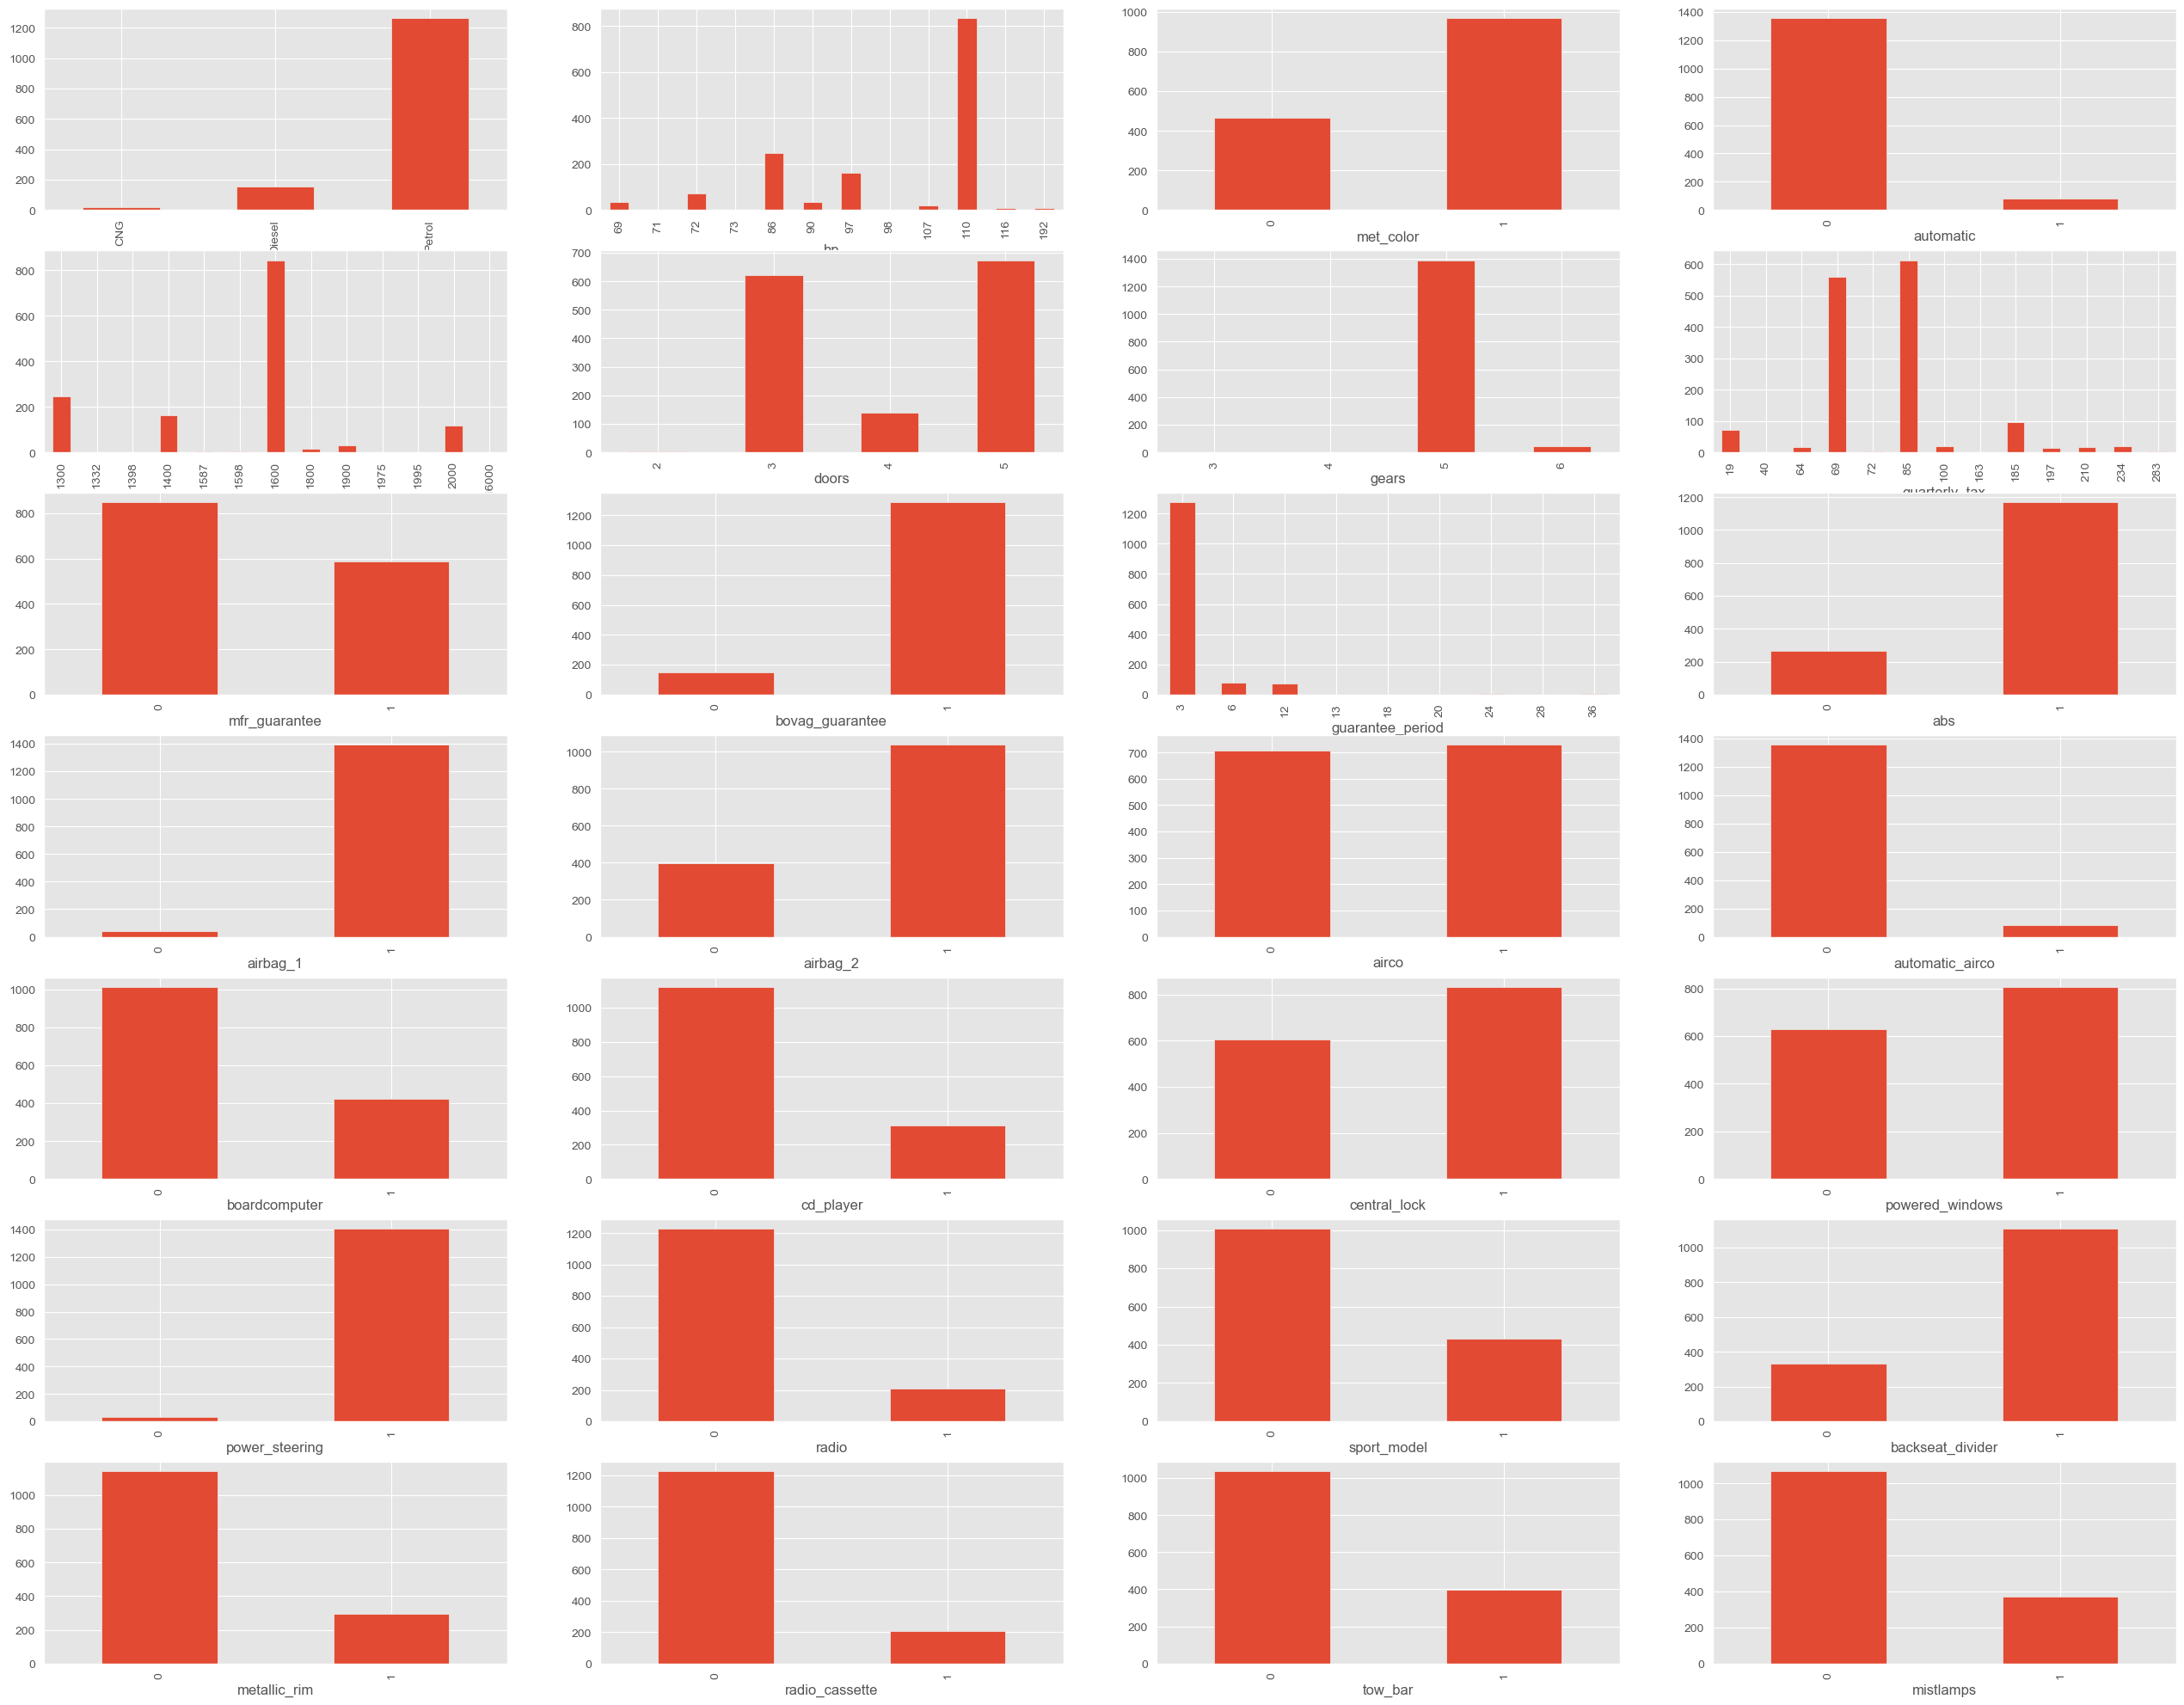

In [667]:
variables_categoricas = ['fuel_type', 'hp', 'met_color', 'automatic', 'cc', 'doors', 'gears',
                         'quarterly_tax', 'mfr_guarantee', 'bovag_guarantee', 'guarantee_period', 'abs', 'airbag_1',
                         'airbag_2' , 'airco', 'automatic_airco', 'boardcomputer', 'cd_player', 'central_lock',
                         'powered_windows', 'power_steering', 'radio', 'sport_model', 'backseat_divider',
                         'metallic_rim', 'radio_cassette', 'tow_bar', 'mistlamps']

fig = plt.figure(figsize=(32,25))

for i in range(len(variables_categoricas)):
  continuos = variables_categoricas[i]

  ax1 = fig.add_subplot(7,4,i+1)
  ax1.set_xlabel(continuos)

  df.groupby(continuos).size().plot(kind='bar')

Visualización de variables continuas

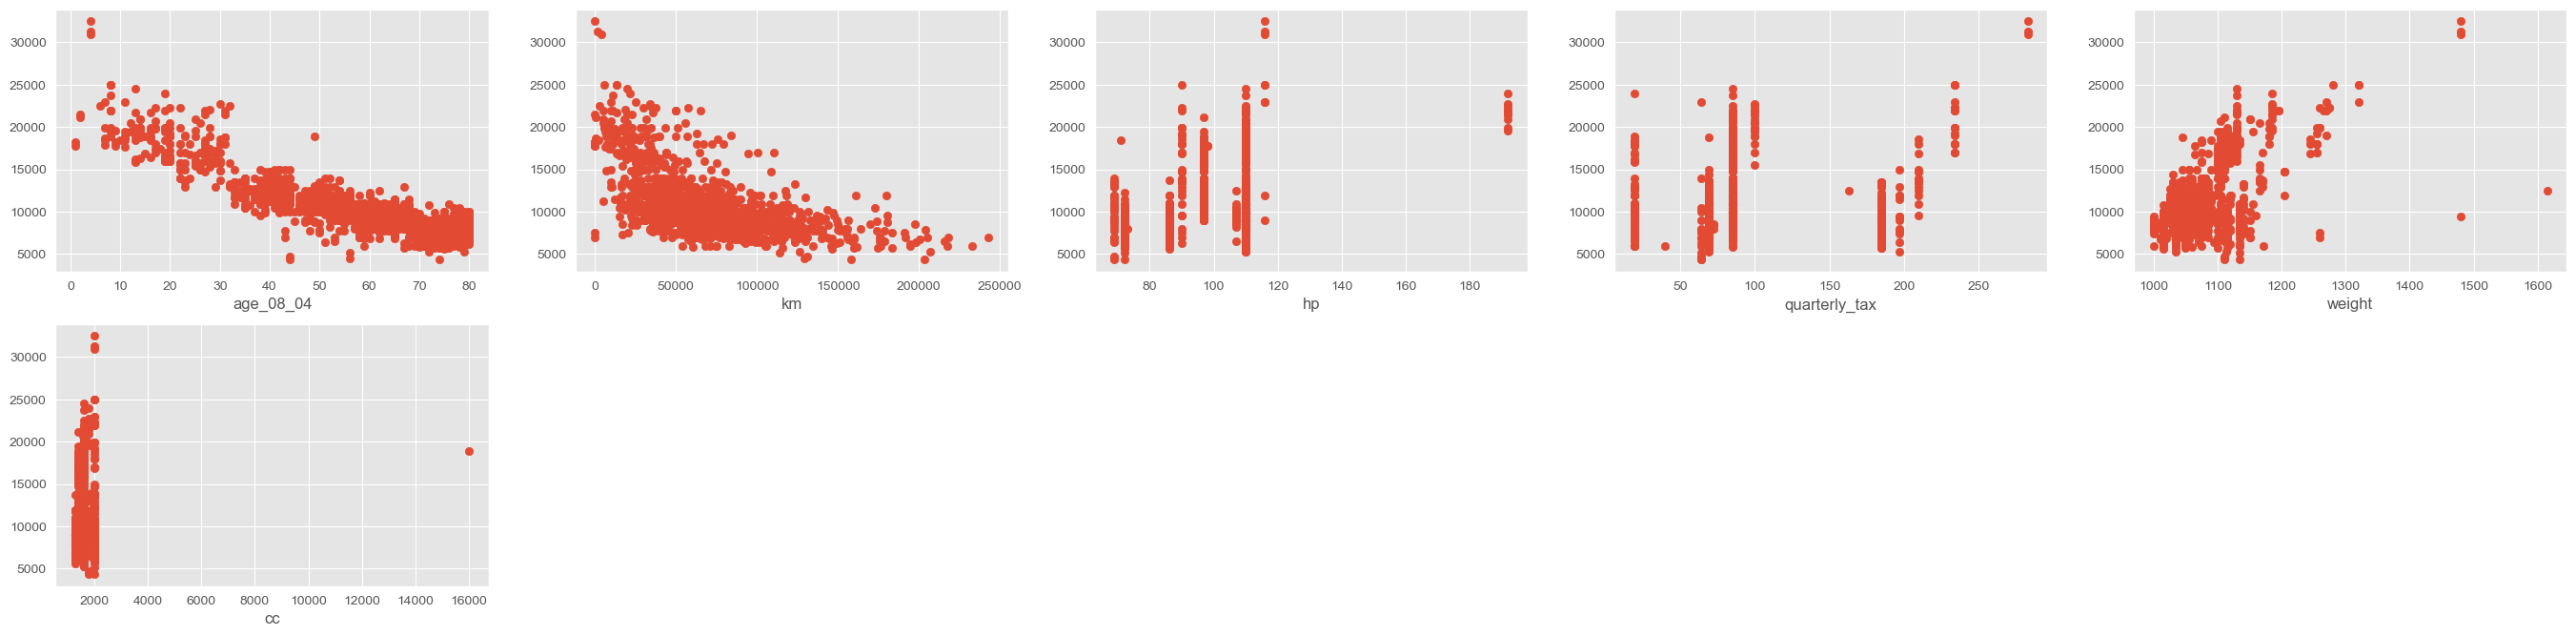

In [668]:
variables_continuas_scatter = ['age_08_04','km','hp','quarterly_tax','weight','cc']

fig = plt.figure(figsize=(34,25))

for i in range(len(variables_continuas_scatter)):
    aux = variables_continuas_scatter[i]

    ax1 = fig.add_subplot(6,5,i+1)
    ax1.set_xlabel(aux)

    plt.scatter(df[aux],df.price)

Podemos observar como las variables hp, quartely_tax no son continuas, es decir son discretas.
Sin embargo podemos observar que la variable cc a primera vista parece continua, pero esto se debe a las proporciones del eje x (debido al outlier), en la gráfica anterior se puede observar como cc es un valor discreto y no continuo

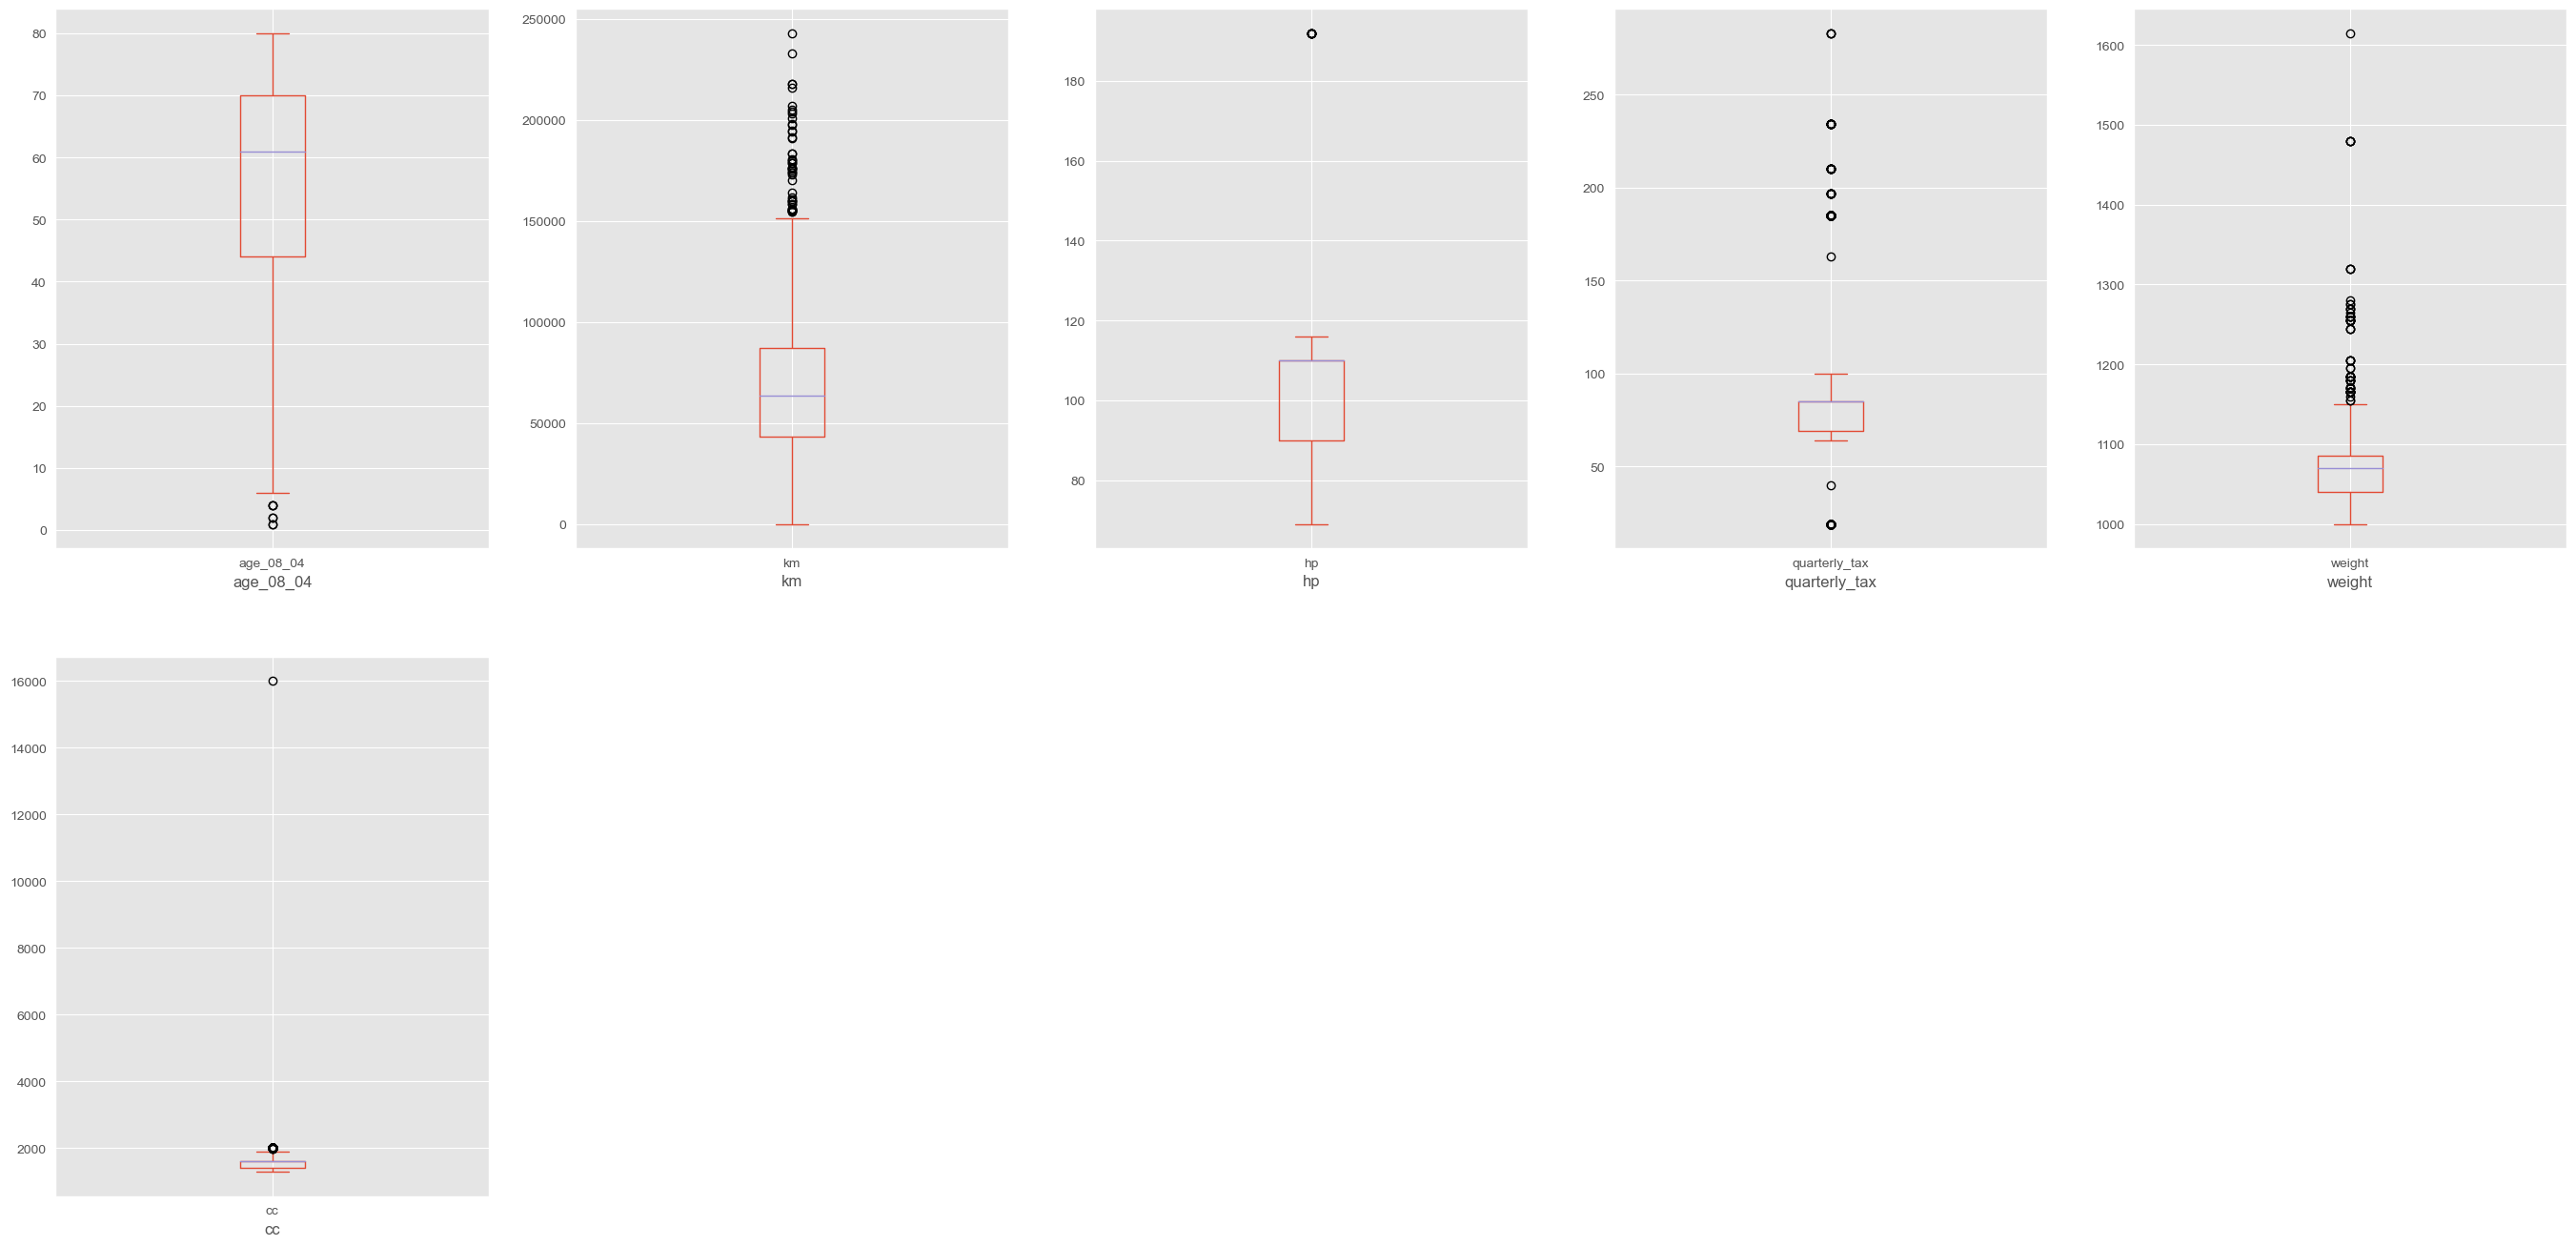

In [669]:
variables_continuas = ['age_08_04','km','hp','quarterly_tax','weight','cc']
fig = plt.figure(figsize=(34,25))

for i in range(len(variables_continuas)):
    continuos = variables_continuas[i]

    ax1 = fig.add_subplot(3,5,i+1)
    ax1.set_xlabel(continuos)

    df_raw[continuos].plot(kind='box')

Realizamos la transformacion dummie de la variable fuel_type

In [670]:
dummies = pd.get_dummies(data=df, columns=['fuel_type'], drop_first=True, prefix="ft_", dtype=int) #convierto la variable categorica Fuel_type en variables booleanas
df = dummies

Visualización de la variable objetivo

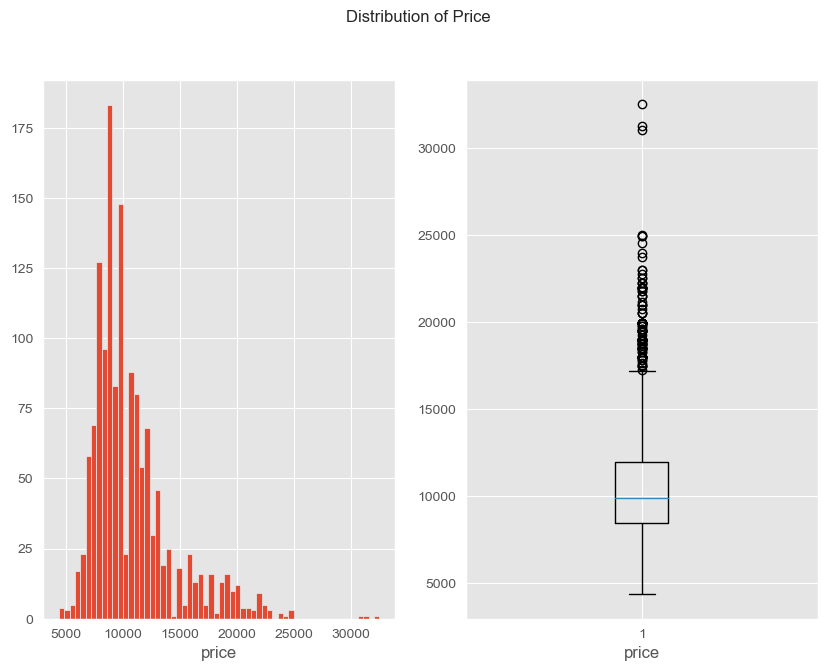

In [671]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
fig.suptitle("Distribution of Price")
ax1.hist(df.price, bins=60)
ax1.set_xlabel(df.price.name)

ax2.boxplot(df.price)
ax2.set_xlabel(df.price.name)

plt.show()

#En esta ocasión se configura el parámetro bins en 60, el cual por defecto es 10, y representa el número de contenedores que serán representados en el histograma.

Se puede observar que el histograma presenta una forma similar a una distribución normal, pero con un alargamiento hacía la derecha.
Esta distribución presenta un sesgo positivo (o a la derecha), en donde la media tendrá un valor mayor que la mediana, y la mediana tendrá un valor mayor que la moda.

Dividimos el dataset en datos de entrenamiento y test

In [672]:
split_param = {
    'test_size' :0.4,
    'random_state': 42,
    'shuffle': True
}

x_train, x_test, y_train, y_test = train_test_split(df.drop(['price'], axis=1), df.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((861, 34), (575, 34), (861,), (575,))

In [673]:
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     273.3
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:52:18   Log-Likelihood:                -7222.8
No. Observations:                 861   AIC:                         1.451e+04
Df Residuals:                     827   BIC:                         1.468e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0098      0.001  

In [674]:
def calculate_and_save_paramaters(x_test, y_test, model, run_name, model_name):
    y_pred = model.predict(sm.add_constant(x_test)) 
    RMSE = mean_squared_error(y_test,y_pred, squared = 'false')
    dw = round(sm.stats.stattools.durbin_watson(model.resid), 3)
    with mlflow.start_run(experiment_id = experiment.experiment_id, run_name=run_name):
        #mlflow.log_metric("accuracy", accuracy)
        mlflow.log_params({"R2": model.rsquared, "R2-Ajustado": model.rsquared_adj, "Skew": model.resid.skew(), "Kurtosis": model.resid.kurtosis(), "Durbin-Watson": dw, "RMSE": RMSE, "F_Statistic": model.fvalue})
        mlflow.sklearn.log_model(model, model_name)

In [675]:
calculate_and_save_paramaters(x_test, y_test, model, 'Todas las variables y todos los registros', 'modelo sin cambios')

2023/10/15 18:52:19 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.7.1/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


### Vamos a probar diferentes puntos de corte en la normalización del precio y ejecutar el modelo para ver cual nos resulta conveniente para seguir trabajando

Ahora buscaremos el valor máximo a partir del cual la variable objetivo (precio) deja de caer dentro del extremo superior del diagrama de caja-bigotes (boxplots)

Valor máximo: 17847.5


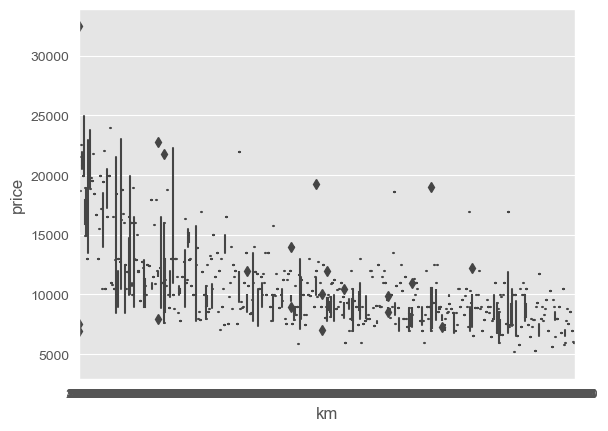

In [676]:
sns.boxplot(x="km", y="price", data=df)
max_value = plt.gca().lines[4].get_ydata().max()
print("Valor máximo:", max_value)

In [677]:
registros_mayores = (df['price'] > max_value).sum()

# Imprimir el número de registros mayores al valor umbral
print("Número de registros mayores a", max_value, ":", registros_mayores)

Número de registros mayores a 17847.5 : 102


Eliminar registros con precios mayores a 24000 para eliminar los outliers mas lejanos

In [678]:
df24 = df[df['price'] <= 24000]

In [679]:
x_train, x_test, y_train, y_test = train_test_split(df24.drop(['price'], axis=1), df24.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((857, 34), (572, 34), (857,), (572,))

Primera ejecución de una regresión con todas las variables y con registros de precios <=24000

In [680]:
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     240.0
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:52:50   Log-Likelihood:                -7211.3
No. Observations:                 857   AIC:                         1.449e+04
Df Residuals:                     823   BIC:                         1.465e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0077      0.001  

In [681]:
calculate_and_save_paramaters(x_test, y_test, model, 'Todas las variables y precios <= 24000', 'modelo filtrado precio 1')

2023/10/15 18:52:51 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.7.1/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


Eliminar registros con precios mayores a 20000

In [682]:
df20 = df[df['price'] <= 20000]

In [683]:
x_train, x_test, y_train, y_test = train_test_split(df20.drop(['price'], axis=1), df20.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((839, 34), (560, 34), (839,), (560,))

In [684]:
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     220.0
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:52:59   Log-Likelihood:                -6974.4
No. Observations:                 839   AIC:                         1.402e+04
Df Residuals:                     805   BIC:                         1.418e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0090      0.001  

In [685]:
calculate_and_save_paramaters(x_test, y_test, model, 'Todas las variables y precios <=20000', 'modelo filtrado precio 2')

2023/10/15 18:53:00 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.7.1/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


Eliminar registros con precios mayores a 17847.5

In [686]:
df17 = df[df['price'] <= 17847.5]

In [687]:
x_train, x_test, y_train, y_test = train_test_split(df17.drop(['price'], axis=1), df17.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 34), (534, 34), (800,), (534,))

In [688]:
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.5
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          4.60e-293
Time:                        18:53:08   Log-Likelihood:                -6614.4
No. Observations:                 800   AIC:                         1.330e+04
Df Residuals:                     766   BIC:                         1.346e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0065      0.001  

In [689]:
calculate_and_save_paramaters(x_test, y_test, model, 'Todas las variables y precios <=17847.5', 'modelo filtrado precio 3')

2023/10/15 18:53:09 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.7.1/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


**Escribir porque decidimos quedarnos con el de 20**

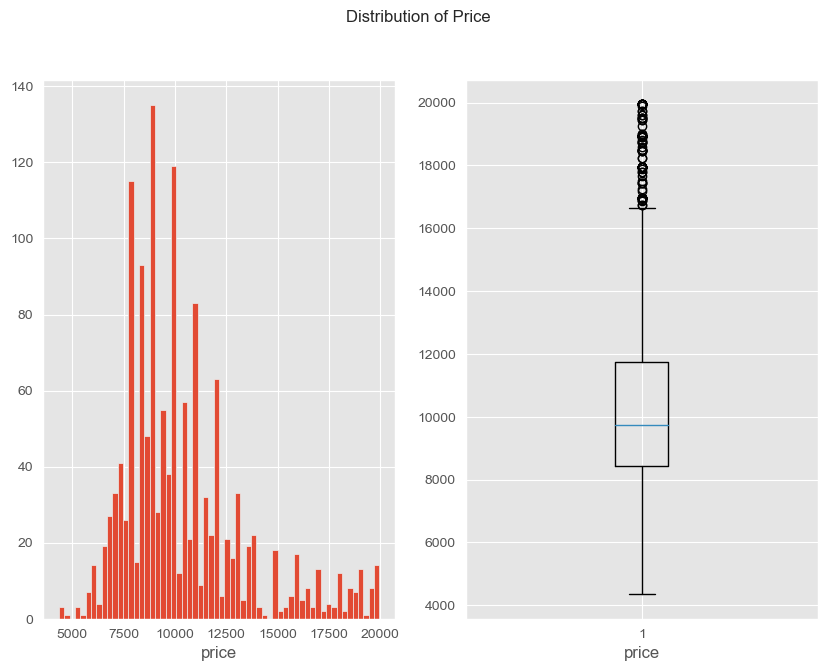

In [690]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
fig.suptitle("Distribution of Price")
ax1.hist(df20.price, bins=60)
ax1.set_xlabel(df20.price.name)

ax2.boxplot(df20.price)
ax2.set_xlabel(df20.price.name)

plt.show()

### Limpieza y analisis de Outliers

In [691]:
df = df20
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (1399, 35)


In [692]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1399.0,10406.879199,3035.517720,4350.0,8425.0,9750.0,11750.0,19950.0
age_08_04,1399.0,57.020014,17.556030,1.0,46.0,61.0,70.0,80.0
mfg_month,1399.0,5.581129,3.357836,1.0,3.0,5.0,8.0,12.0
mfg_year,1399.0,1999.533238,1.445778,1998.0,1998.0,1999.0,2000.0,2004.0
km,1399.0,69796.400286,37066.720356,1.0,44497.5,64383.0,88063.5,243000.0
hp,1399.0,100.771980,13.224437,69.0,86.0,110.0,110.0,192.0
met_color,1399.0,0.671194,0.469947,0.0,0.0,1.0,1.0,1.0
automatic,1399.0,0.054325,0.226738,0.0,0.0,0.0,0.0,1.0
cc,1399.0,1571.384560,427.583503,1300.0,1400.0,1600.0,1600.0,16000.0
doors,1399.0,4.020729,0.952521,2.0,3.0,4.0,5.0,5.0


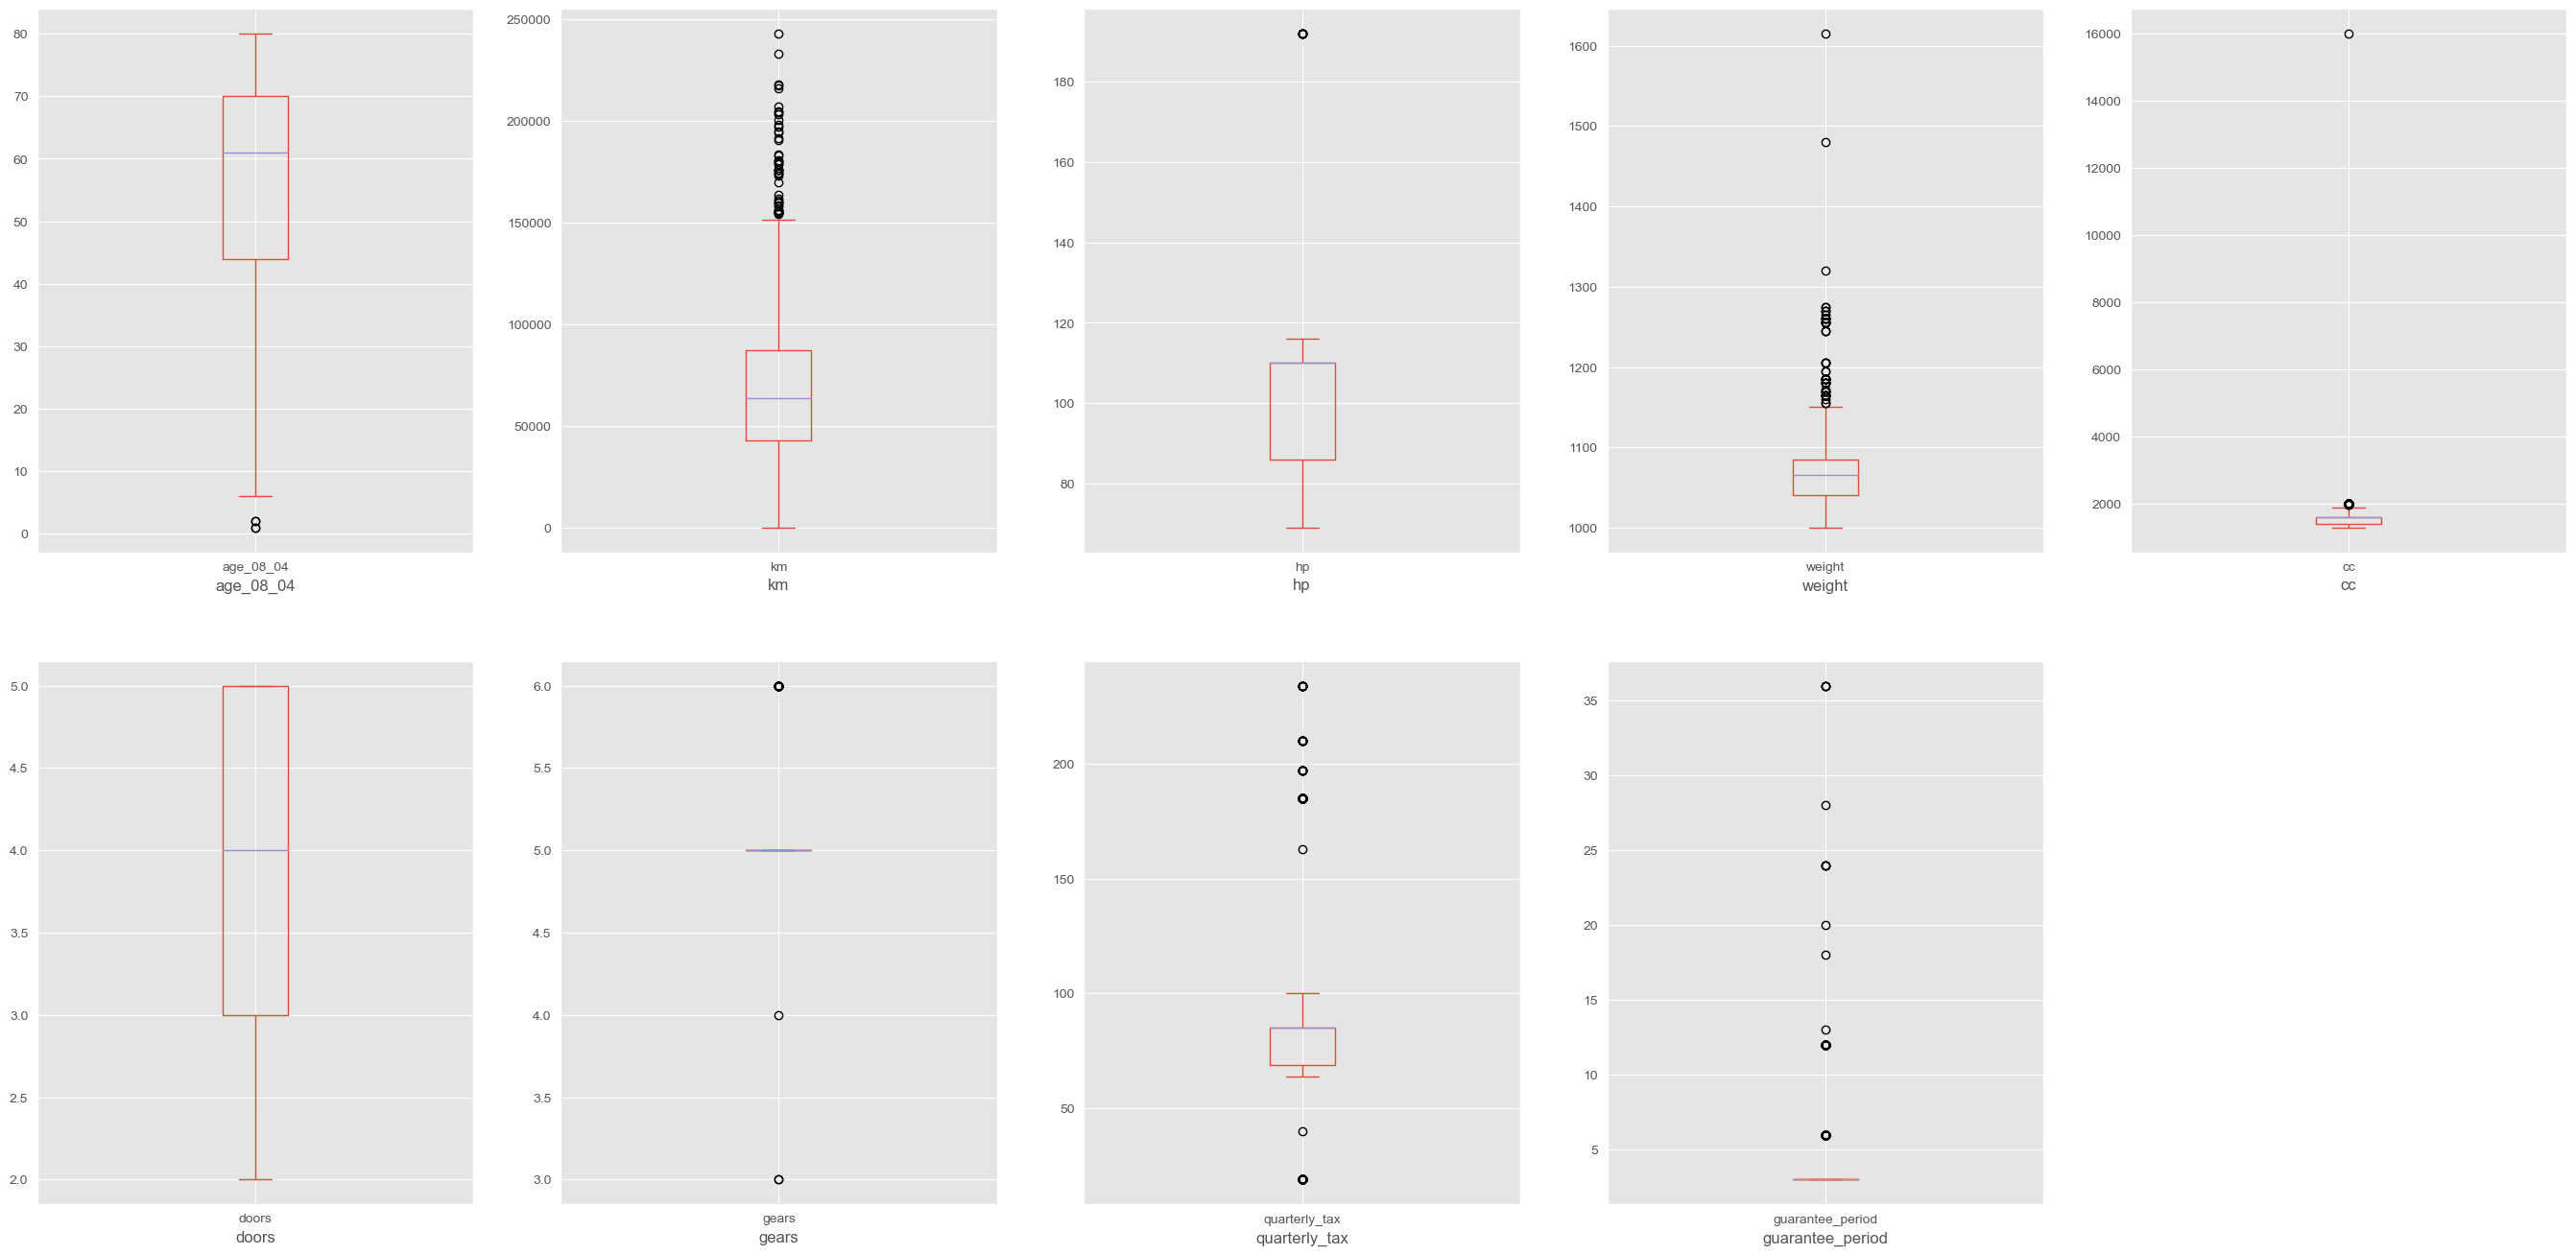

In [693]:
boxplots = ['age_08_04','km','hp','weight','cc', 'doors', 'gears', 'quarterly_tax', 'guarantee_period']
fig = plt.figure(figsize=(34,25))

for i in range(len(boxplots)):
    continuos = boxplots[i]

    ax1 = fig.add_subplot(3,5,i+1)
    ax1.set_xlabel(continuos)

    df24[continuos].plot(kind='box')

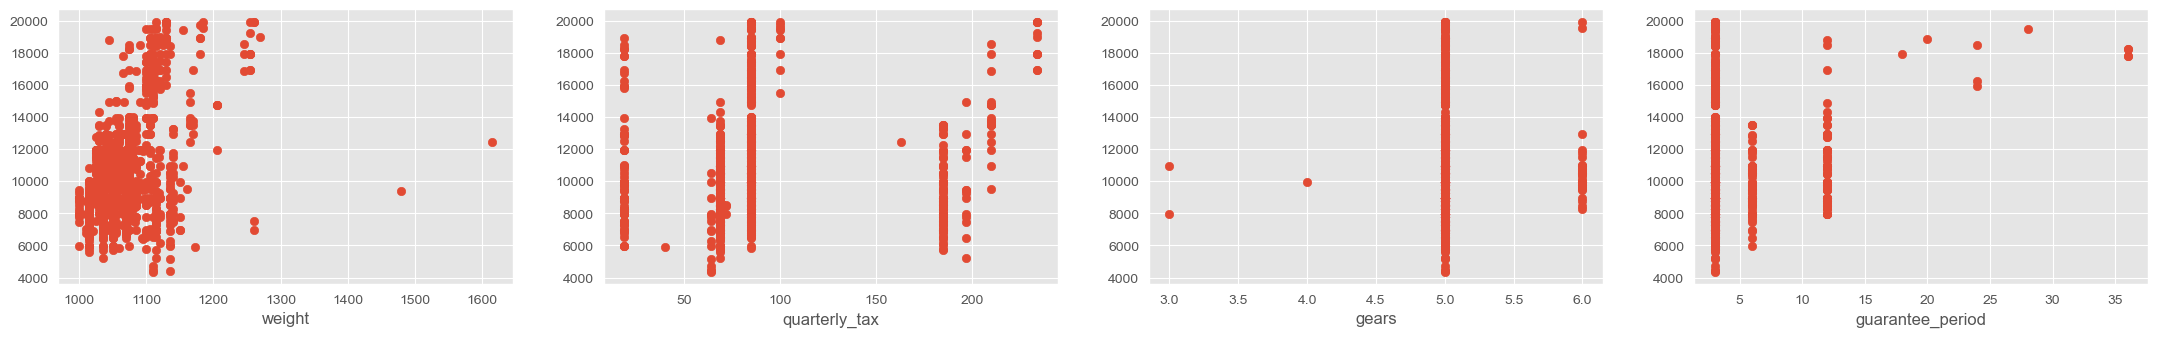

In [694]:
variables_continuas_scatter = ['weight','quarterly_tax', 'gears', 'guarantee_period']

fig = plt.figure(figsize=(34,25))

for i in range(len(variables_continuas_scatter)):
    aux = variables_continuas_scatter[i]

    ax1 = fig.add_subplot(6,5,i+1)
    ax1.set_xlabel(aux)

    plt.scatter(df[aux],df.price)

In [695]:
cantidad_registros = df[df['hp'] == 192].shape[0]

print(f"La cantidad de registros con 'hp' igual a 192 es: {cantidad_registros}")

La cantidad de registros con 'hp' igual a 192 es: 2


In [696]:
df = df[df['hp'] < 192]

In [697]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (1397, 35)


In [698]:
cantidad_registros = df[df['weight'] > 1400].shape[0]

print(f"La cantidad de registros con 'weight' mayor a 1400 es: {cantidad_registros}")

La cantidad de registros con 'weight' mayor a 1400 es: 2


In [699]:
df = df[df['weight'] <= 1400]

In [700]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (1395, 35)


<Axes: xlabel='gears'>

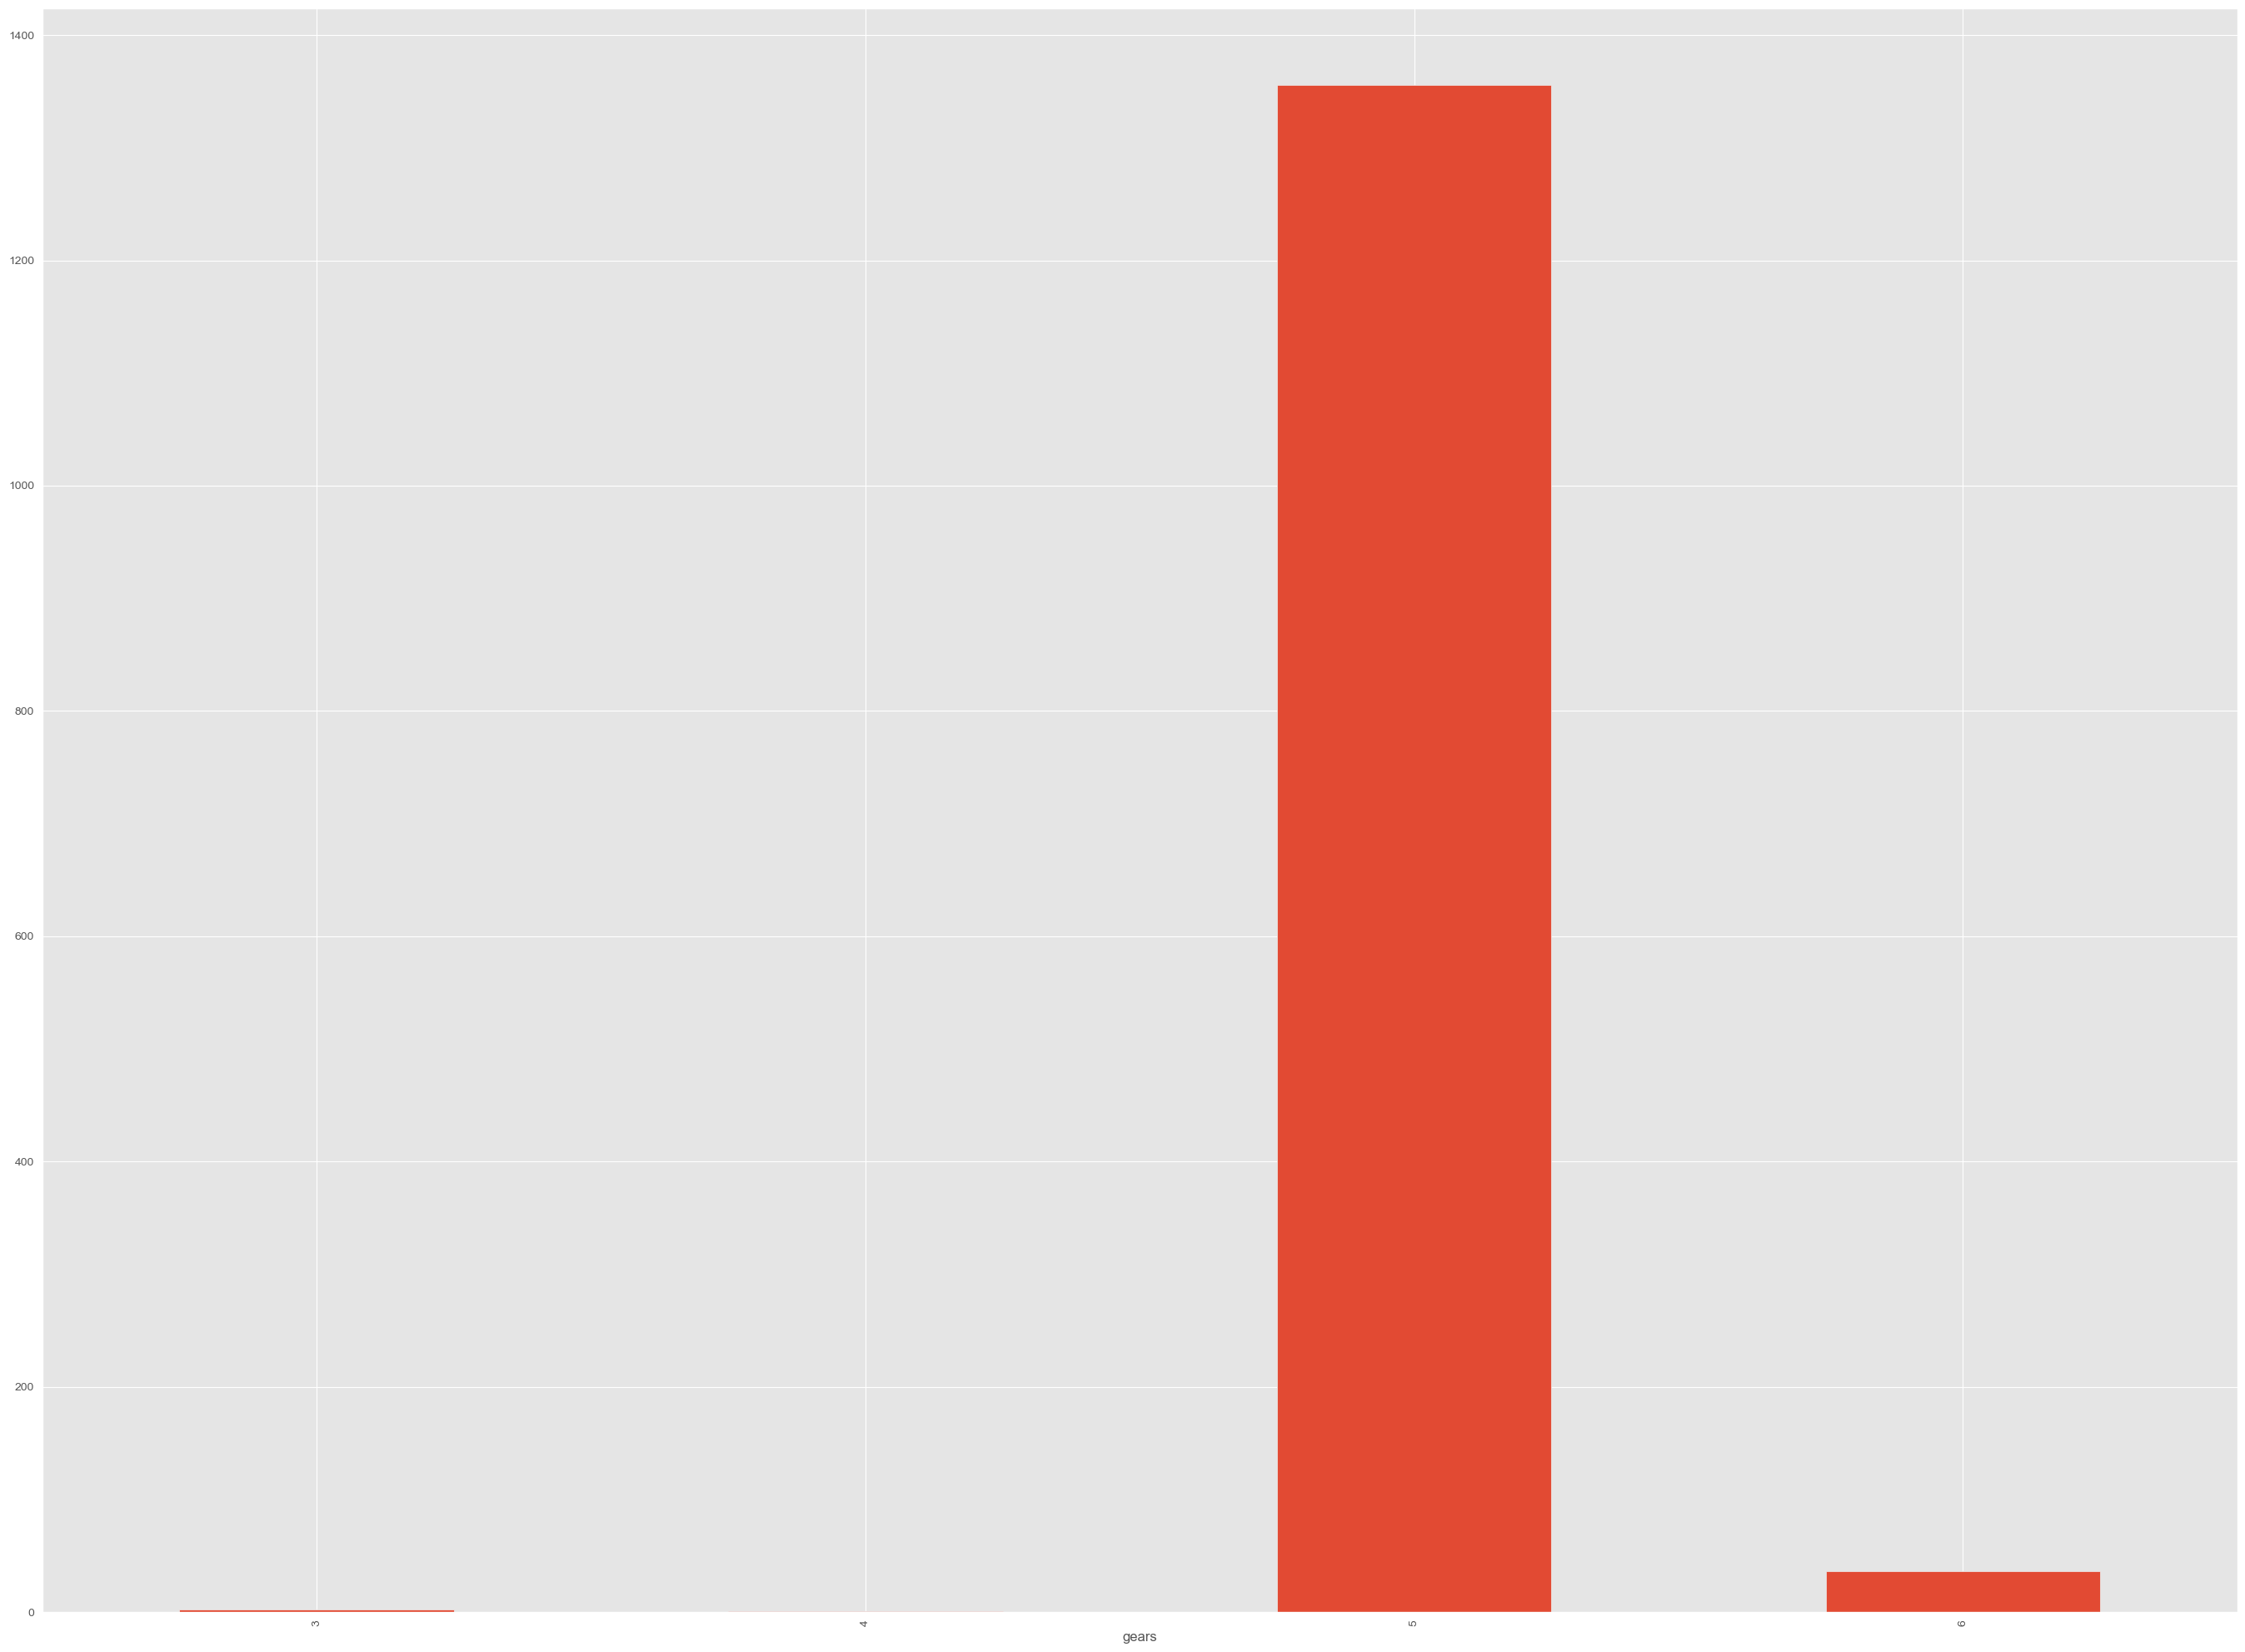

In [701]:
fig = plt.figure(figsize=(34,25))
ax1.set_xlabel('gears')
df.groupby('gears').size().plot(kind='bar')

In [702]:
cantidad_registros1 = df[df['gears'] == 6].shape[0]
cantidad_registros2 = df[df['gears'] < 4.5].shape[0]

print(f"La cantidad de registros con 'gears' igual a 6 es: {cantidad_registros1}")
print(f"La cantidad de registros con 'gears' menor a 4.5 es: {cantidad_registros2}")

La cantidad de registros con 'gears' igual a 6 es: 36
La cantidad de registros con 'gears' menor a 4.5 es: 3


In [703]:
df = df[df['gears'] > 4]

In [704]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (1392, 35)


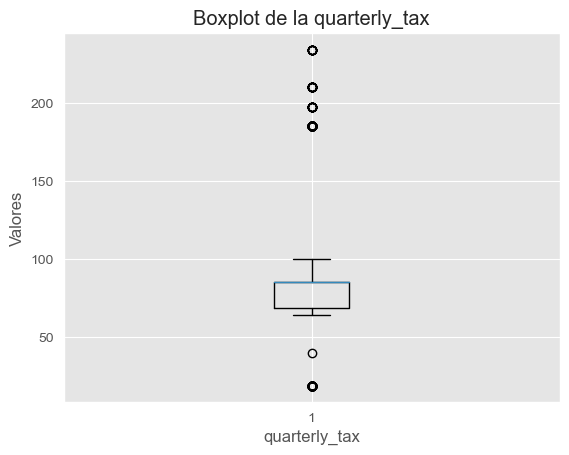

In [705]:
#fig = plt.figure(figsize=(34,25))
#ax1.set_xlabel('quarterly_tax')
#df['quarterly_tax'].plot(kind='box')

plt.boxplot(df['quarterly_tax'])
# Añadir etiquetas y título
plt.xlabel('quarterly_tax')
plt.ylabel('Valores')
plt.title('Boxplot de la quarterly_tax')

# Mostrar el boxplot
plt.show()

In [706]:
cantidad_registros1 = df[df['quarterly_tax'] > 150].shape[0]
cantidad_registros2 = df[df['quarterly_tax'] < 50].shape[0]

print(f"La cantidad de registros con 'quarterly_tax' mayor a 150 es: {cantidad_registros1}")
print(f"La cantidad de registros con 'quarterly_tax' menor a 50 es: {cantidad_registros2}")

La cantidad de registros con 'quarterly_tax' mayor a 150 es: 138
La cantidad de registros con 'quarterly_tax' menor a 50 es: 71


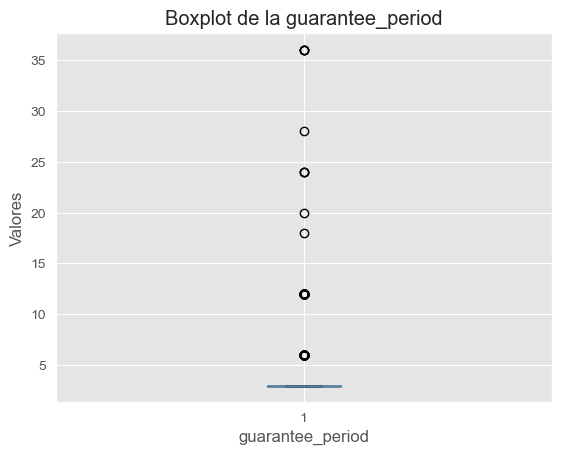

In [707]:
plt.boxplot(df['guarantee_period'])
# Añadir etiquetas y título
plt.xlabel('guarantee_period')
plt.ylabel('Valores')
plt.title('Boxplot de la guarantee_period')

# Mostrar el boxplot
plt.show()

In [708]:
cantidad_registros1 = df[df['guarantee_period'] > 35].shape[0]

print(f"La cantidad de registros con 'guarantee_period' mayor a 5 es: {cantidad_registros1}")

La cantidad de registros con 'guarantee_period' mayor a 5 es: 4


In [709]:
df = df[df['guarantee_period'] < 35]

In [710]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (1388, 35)


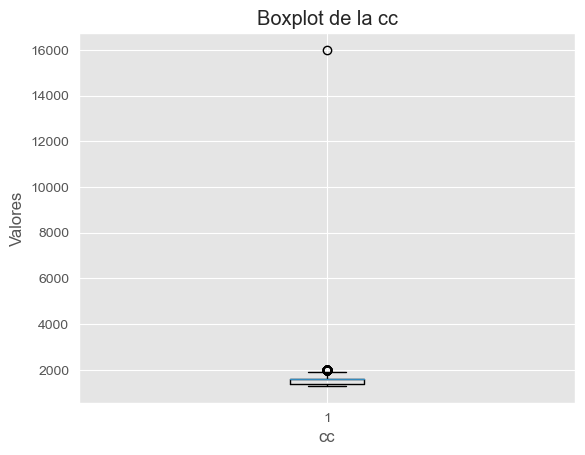

In [711]:
plt.boxplot(df['cc'])
# Añadir etiquetas y título
plt.xlabel('cc')
plt.ylabel('Valores')
plt.title('Boxplot de la cc')

# Mostrar el boxplot
plt.show()

In [712]:
df.loc[df['cc'] == 16000, 'cc'] = 1600

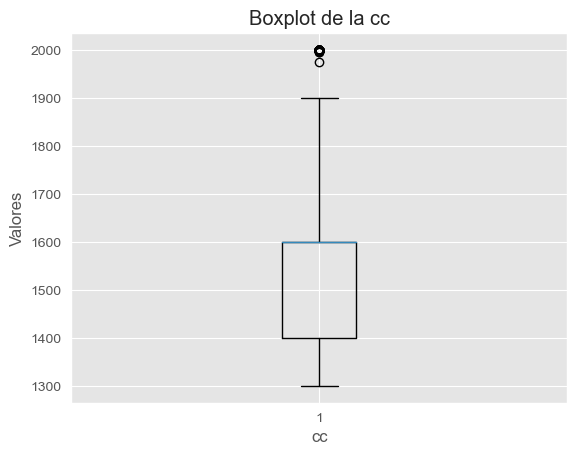

In [713]:
plt.boxplot(df['cc'])
# Añadir etiquetas y título
plt.xlabel('cc')
plt.ylabel('Valores')
plt.title('Boxplot de la cc')

# Mostrar el boxplot
plt.show()

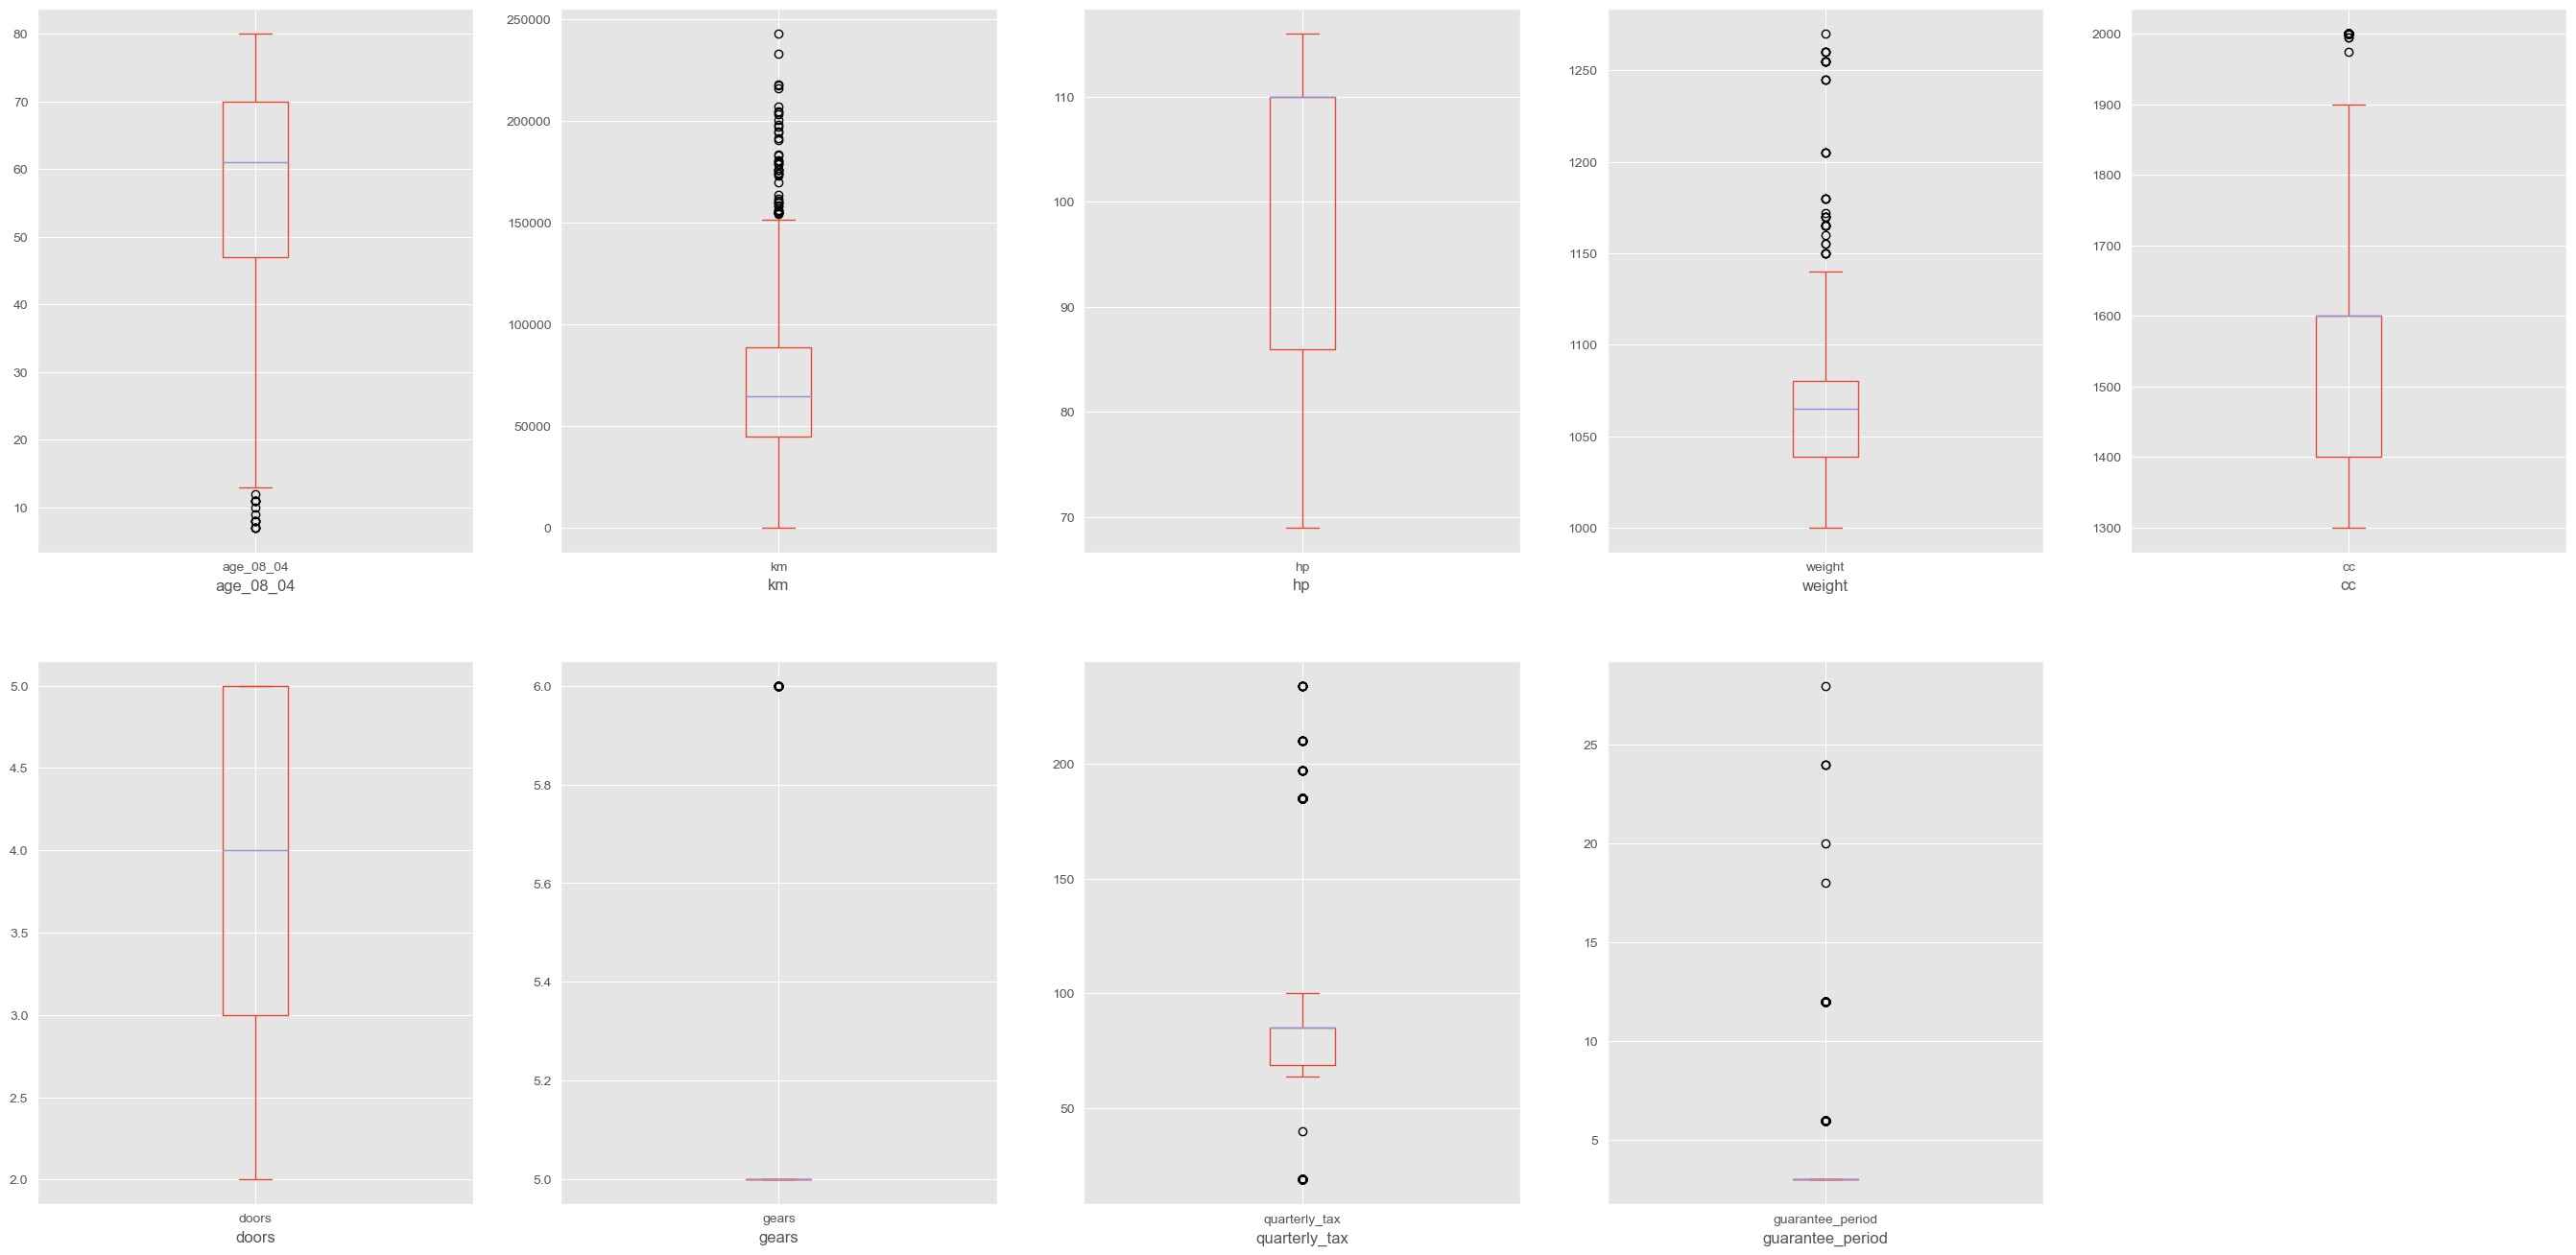

In [714]:
boxplots = ['age_08_04','km','hp','weight','cc', 'doors', 'gears', 'quarterly_tax', 'guarantee_period']
fig = plt.figure(figsize=(34,25))

for i in range(len(boxplots)):
    continuos = boxplots[i]

    ax1 = fig.add_subplot(3,5,i+1)
    ax1.set_xlabel(continuos)

    df[continuos].plot(kind='box')

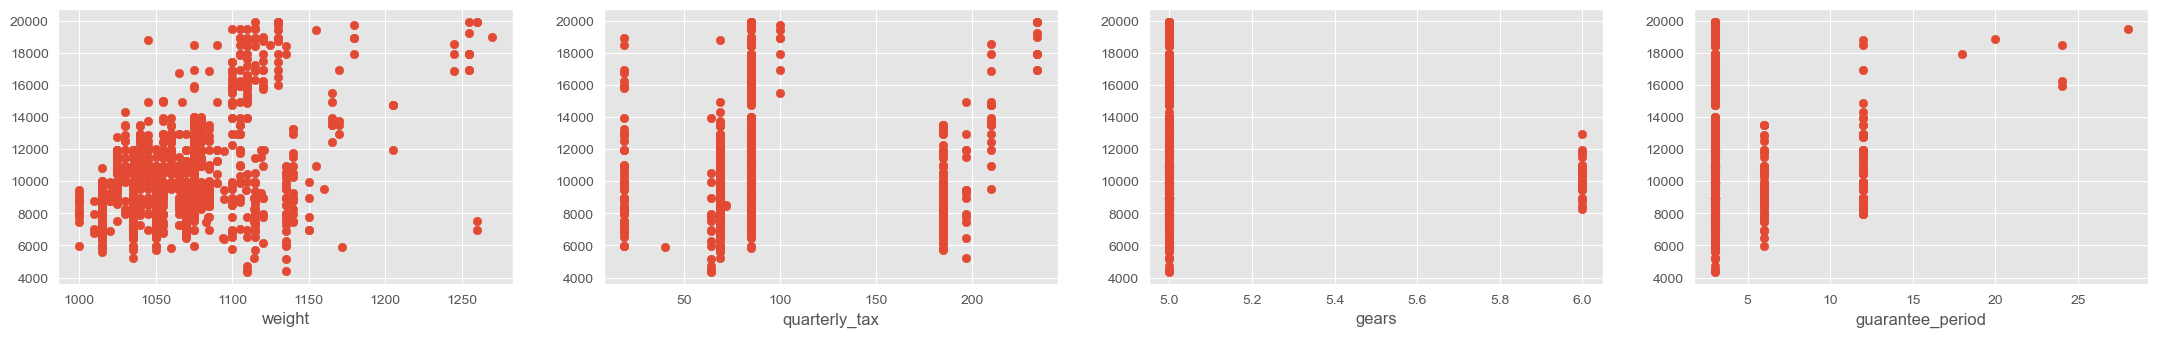

In [715]:
variables_continuas_scatter = ['weight','quarterly_tax', 'gears', 'guarantee_period']

fig = plt.figure(figsize=(34,25))

for i in range(len(variables_continuas_scatter)):
    aux = variables_continuas_scatter[i]

    ax1 = fig.add_subplot(6,5,i+1)
    ax1.set_xlabel(aux)

    plt.scatter(df[aux],df.price)

Vemos las dimensiones del dataset luego de la limpieza de outliers

In [716]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (1388, 35)


# Modelo 1

In [717]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['price'], axis=1), df.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((832, 34), (556, 34), (832,), (556,))

In [718]:
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     211.9
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:53:24   Log-Likelihood:                -6914.8
No. Observations:                 832   AIC:                         1.390e+04
Df Residuals:                     798   BIC:                         1.406e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0112      0.001  

In [719]:
calculate_and_save_paramaters(x_test, y_test, model, 'Limpieza de outliers con el df elegido anteriormente', 'Linea base')

2023/10/15 18:53:24 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.7.1/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


# Análisis de la regresión y decisión sobre las variables

In [720]:
# met_color -> t = 0.605 y P>|t| = 0.546
# Falta de significancia estadística: El valor "t" se utiliza para evaluar si el coeficiente es estadísticamente
# diferente de cero. En este caso, un valor "t" de 0.605 sugiere que el coeficiente no es muy diferente de cero.
# Si el valor "t" es cercano a cero, esto indica que la variable independiente correspondiente puede no estar
# contribuyendo significativamente a la predicción del resultado. Esto podría sugerir que la variable no es relevante
# en el modelo y podría eliminarse.

# Alto valor p: El valor "P>|t|" se utiliza para evaluar si el coeficiente es estadísticamente significativo.
# Un valor p alto, como 0.546, sugiere que no hay suficiente evidencia para rechazar la hipótesis nula de que el
# coeficiente es igual a cero. En otras palabras, la variable independiente no tiene un efecto estadísticamente
# significativo en el resultado. Un valor p alto es una indicación de que la variable podría no ser importante en el
# modelo.


# Variable         t value     P>|t| value
#hp                 0.229      0.819
#met_color          0.802      0.423
#automatic          0.559      0.576
#cc                -1.280      0.201
#gears             -0.519      0.604
#abs               -1.222      0.222
#airbag_1          -0.107      0.915
#airbag_2          -0.320      0.749
#central_lock       0.173      0.863
#power_steering    -1.470      0.142
#mistlamps         -0.444      0.657
#sport_model        1.253      0.210
#backseat_divider  -1.410      0.159
#metallic_rim       1.235      0.217
#tow_bar           -1.183      0.237
#ft__Diesel         0.341      0.733

#Tambien eliminamos las variables mfg_month y mfg_year porque age_08_04 nos proveé la antiguedad del vehiculo y tener los años y meses de manufactura es redundante,
# ademas el t value de age es mucho mayor (-23.935), por lo tanto decidimos quedarnos con age.

# Comienzo nuevo modelo - MODELO 2

In [721]:
#columns_to_delete = ['hp', 'met_color', 'automatic','cc', 'gears', 'abs', 'airbag_1', 'airbag_2', 'central_lock', 'power_steering', 'mistlamps', 'sport_model', 'backseat_divider', 'metallic_rim', 'tow_bar', 'ft__Diesel', 'mfg_month', 'mfg_year']      ------ df24
columns_to_delete = ['met_color', 'automatic', 'gears', 'abs', 'boardcomputer', 'airbag_1', 'airbag_2', 'central_lock', 'power_steering','radio', 'mistlamps', 'sport_model', 'backseat_divider', 'metallic_rim','radio_cassette', 'tow_bar', 'mfg_month', 'mfg_year']  # ------ df20

df2 = df.drop(columns=columns_to_delete, axis=1)
df2 = pd.DataFrame(df2)

In [722]:
x_train, x_test, y_train, y_test = train_test_split(df2.drop(['price'], axis=1), df2.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((832, 16), (556, 16), (832,), (556,))

In [723]:
#Segunda ejecución de una regresión con todas las variables.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     395.1
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:53:33   Log-Likelihood:                -6959.9
No. Observations:                 832   AIC:                         1.395e+04
Df Residuals:                     815   BIC:                         1.403e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.034e+04   2002.245  

In [724]:
calculate_and_save_paramaters(x_test, y_test, model, 'Primer analisis de las variables de regresion y eliminacion de 18 variables - Segundo regresion', 'modelo 2')

2023/10/15 18:53:33 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.7.1/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


In [725]:
#Siguiendo esta linea las variables a eliminar son:
# Los t value de 2,XX que a su vez poseian un P value malo.

# Variable          t value     P>|t| value
#doors              2.233      0.026     
#airco               2.216      0.027
#cd_player           2.871      0.004
#radio               1.654      0.098
#radio_cassette     -1.859      0.063 

# Comienzo nuevo modelo - MODELO 3

In [726]:
#columns_to_delete = ['doors', 'airco', 'cd_player', 'radio', 'radio_cassette'] ------ df24
columns_to_delete = ['doors', 'bovag_guarantee', 'airco', 'cd_player'] # ------ df20
df3 = df2.drop(columns=columns_to_delete, axis=1)
df3 = pd.DataFrame(df3)

In [727]:
x_train, x_test, y_train, y_test = train_test_split(df3.drop(['price'], axis=1), df3.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((832, 12), (556, 12), (832,), (556,))

In [728]:
#Tercera ejecución de una regresión con todas las variables.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     511.6
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:53:40   Log-Likelihood:                -6972.5
No. Observations:                 832   AIC:                         1.397e+04
Df Residuals:                     819   BIC:                         1.403e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8159.1487   1835.385  

In [729]:
calculate_and_save_paramaters(x_test, y_test, model, 'Eliminacion de 5 variables más - Tercera regresion', 'modelo 3')

2023/10/15 18:53:40 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.7.1/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


# TEST

Prueba de algoritmo Random Forest (Ensemble learning) para solucionar el problema de underfitting de toyota.
Los algoritmos de ensemble learning son técnicas que combinan las predicciones de varios modelos de aprendizaje automático para mejorar el rendimiento y la generalización.

In [730]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(x_train, y_train)
#print(modelo_rf.summary)

RandomForestRegressor(random_state=42)

In [731]:
from sklearn.metrics import r2_score
from scipy.stats import skew, kurtosis

y_pred = modelo_rf.predict(x_test)
RMSE = mean_squared_error(y_test,y_pred, squared = 'false')

# Calcular R2
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

# Calcular skewness y kurtosis de los residuos
residuos = y_test - y_pred
skewness = skew(residuos)
kurt = kurtosis(residuos)

print(f'Skewness de los Residuos: {skewness}')
print(f'Kurtosis de los Residuos: {kurt}')
print(f'RMSE: {RMSE}')

R2 Score: 0.8694955770896288
Skewness de los Residuos: 0.5143692054357702
Kurtosis de los Residuos: 5.080555027854011
RMSE: 1072766.8918841726


Prueba de aumentar la complejidad del modelo mediante una regresion polinomica para solucionar el problema de underfitting.
Utiliza un modelo más complejo que pueda capturar mejor los patrones en los datos. Por ejemplo, si estás utilizando una regresión lineal, podrías cambiar a un modelo más complejo como una regresión polinómica o un modelo de aprendizaje profundo.

In [732]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model_pol = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

In [733]:
model_pol.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [734]:
# Realizar predicciones
y_pred_pol = model_pol.predict(x_test)

# Calcular R2
r2_pol = r2_score(y_test, y_pred_pol)
print(f'R2 Score: {r2_pol}')

# Calcular skewness y kurtosis de los residuos
residuos_pol = y_test - y_pred_pol
skewness_pol = skew(residuos_pol)
kurt_pol = kurtosis(residuos_pol)

# Calcular el Error Cuadrático Medio (MSE)
mse_pol = mean_squared_error(y_test, y_pred_pol)
# Calcular el RMSE
rmse_pol = np.sqrt(mse_pol)

print(f'RMSE: {rmse_pol}')
print(f'Skewness de los Residuos: {skewness_pol}')
print(f'Kurtosis de los Residuos: {kurt_pol}')

R2 Score: 0.581243397675543
RMSE: 1855.328856206461
Skewness de los Residuos: 9.392778288146772
Kurtosis de los Residuos: 134.10279197014063


# END TEST

In [735]:
print(f'Dimensiones del dataset: {df3.shape}')

Dimensiones del dataset: (1388, 13)


<Axes: title={'center': 'Mapa de Correlaciones'}>

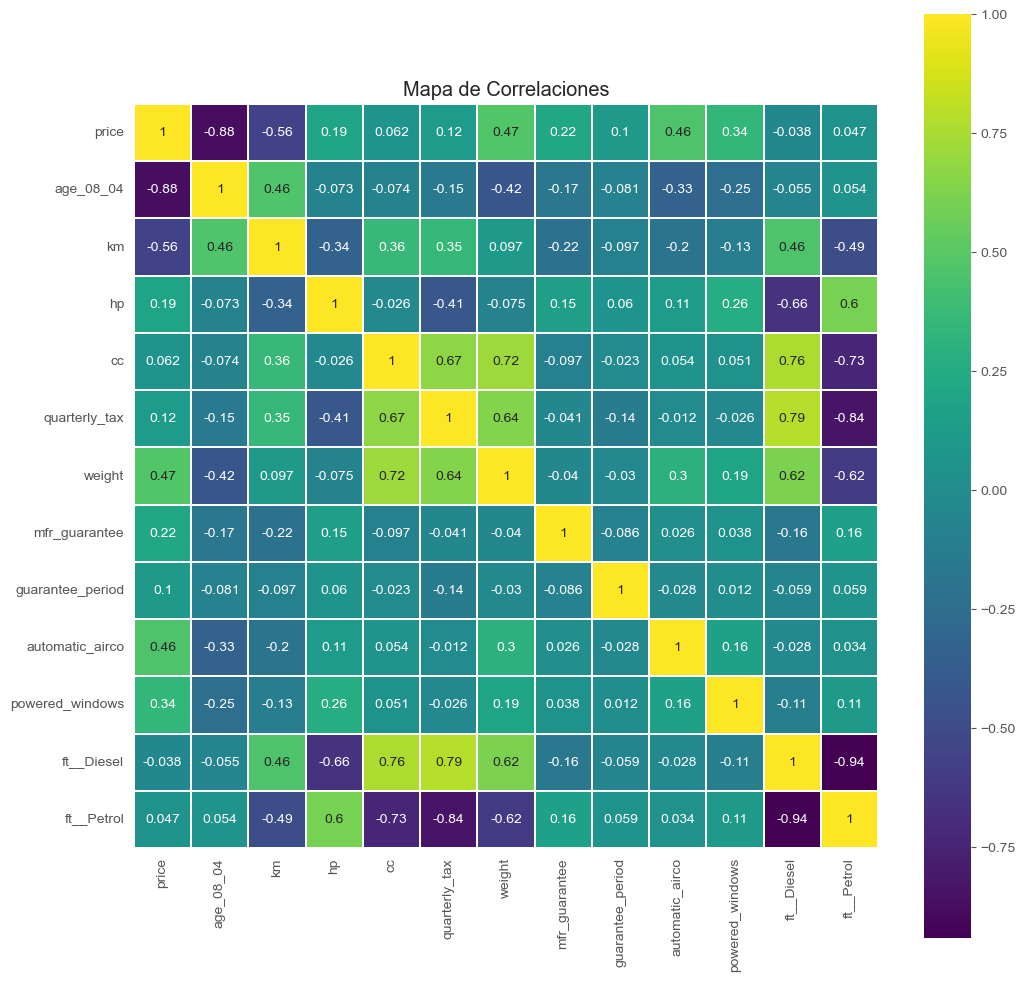

In [736]:
plt.figure(figsize=(12,12))
plt.title("Mapa de Correlaciones")
corr = df3.corr(method="pearson")
sns.heatmap(corr, annot=True, cmap=plt.cm.viridis, linewidths=0.1, linecolor="white", square=True)

# Analisis de Valores Ajustados vs Residuales

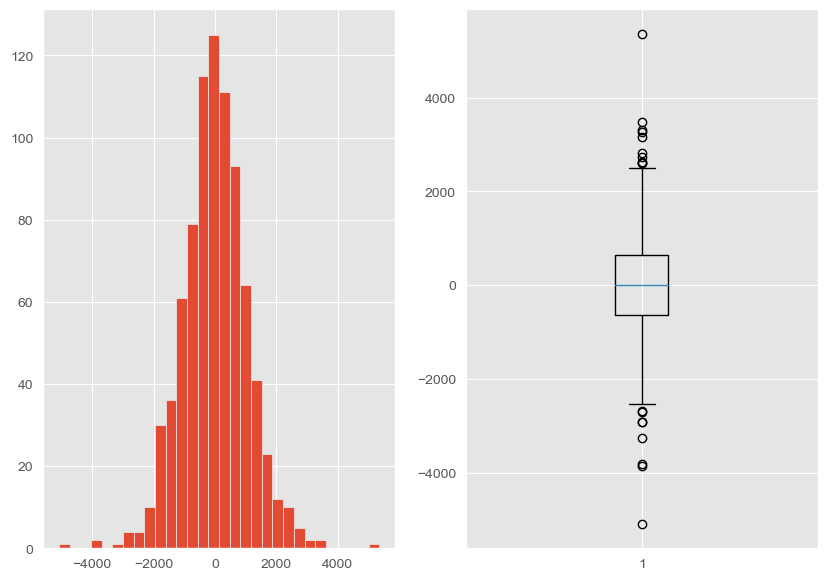

In [737]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,7))
ax1.hist(model.resid, bins=30)
ax2.boxplot(model.resid)
plt.show()

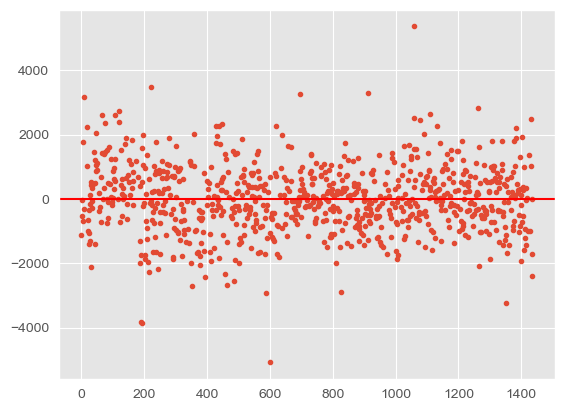

In [738]:
fitted_values = model.fittedvalues
residuals = y_train - fitted_values

fig, ax = plt.subplots()
ax.plot(residuals, marker='.', alpha = 1, linestyle='None')
ax.axhline(y=0, color = 'r')
plt.show()

Text(0, 0.5, 'Residuals')

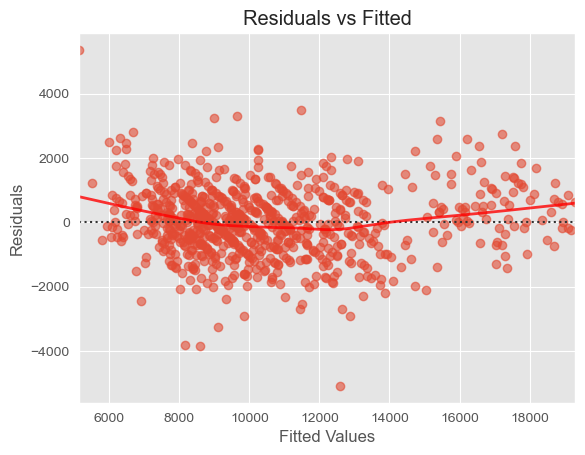

In [739]:
# También conocido como "Residual Plot"
plot = sns.residplot(y=residuals, x=fitted_values, lowess=True,
                     scatter_kws={'alpha':0.6},
                     line_kws={'color': 'red', 'lw':2, 'alpha':0.8})
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted Values')
plot.set_ylabel('Residuals')

# Otra form de hacer el plot
#fig, ax = plt.subplots()
#sns.scatterplot(x=fitted_values, y=residuals)
#ax.axhline(y=0, color='grey', linestyle='dashed')
#ax.set_xlabel('Fitted values')
#ax.set_ylabel('Sqrt(standardized residuals)')
#ax.set_title('Scale-Location Plot')

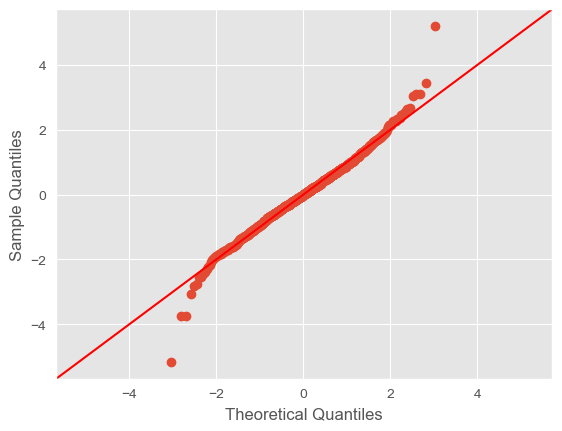

In [740]:
residuals_norm = model.get_influence().resid_studentized_internal
plot = sm.qqplot(residuals_norm, line='45')

Text(0.5, 1.0, 'Residuals vs Leverage Plot')

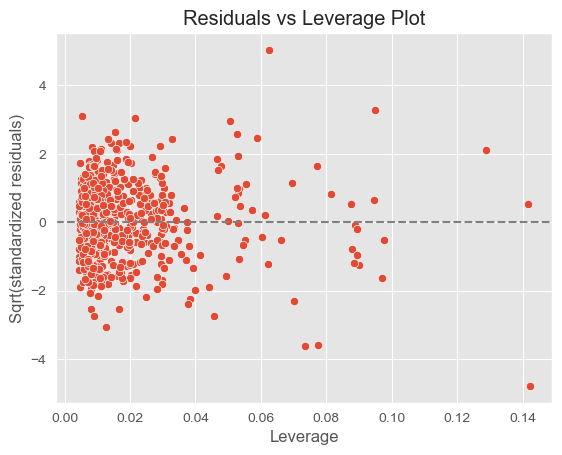

In [741]:
stand_resids = model.resid_pearson

influence = model.get_influence()
leverage = influence.hat_matrix_diag

fig, ax = plt.subplots()
sns.scatterplot(x=leverage, y=stand_resids)
ax.axhline(y=0, color='grey', linestyle='dashed')
ax.set_xlabel('Leverage')
ax.set_ylabel('Sqrt(standardized residuals)')
ax.set_title('Residuals vs Leverage Plot')

In [742]:
df_out = df3
df_out['residuals'] = residuals
outliers = df_out[(df_out['residuals'] > 4000) | (df_out['residuals'] < -4000)]
print(outliers)

      price  age_08_04      km  hp    cc  quarterly_tax  weight  \
601    7500         50       1  90  2000             64    1260   
1058  10500         77  172980  72  2000             64    1135   

      mfr_guarantee  guarantee_period  automatic_airco  powered_windows  \
601               0                 3                0                1   
1058              0                 3                0                0   

      ft__Diesel  ft__Petrol    residuals  
601            1           0 -5083.798539  
1058           1           0  5358.841449  


In [743]:
df_without_out = df3.drop(outliers.index)
df_without_out.drop(columns='residuals', axis=1, inplace=True)

print(f'Dimensiones del dataset 3: {df3.shape}')
print(f'Dimensiones del dataset 4: {df_without_out.shape}')

Dimensiones del dataset 3: (1388, 14)
Dimensiones del dataset 4: (1386, 13)


In [744]:
x_train, x_test, y_train, y_test = train_test_split(df_without_out.drop(['price'], axis=1), df_without_out.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((831, 12), (555, 12), (831,), (555,))

In [745]:
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     558.9
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:53:49   Log-Likelihood:                -6938.5
No. Observations:                 831   AIC:                         1.390e+04
Df Residuals:                     818   BIC:                         1.396e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8169.6917   1771.294  

In [746]:
calculate_and_save_paramaters(x_test, y_test, model, 'Eliminacion de 2 outliers en los residuos', 'modelo 4')

2023/10/15 18:53:50 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.7.1/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


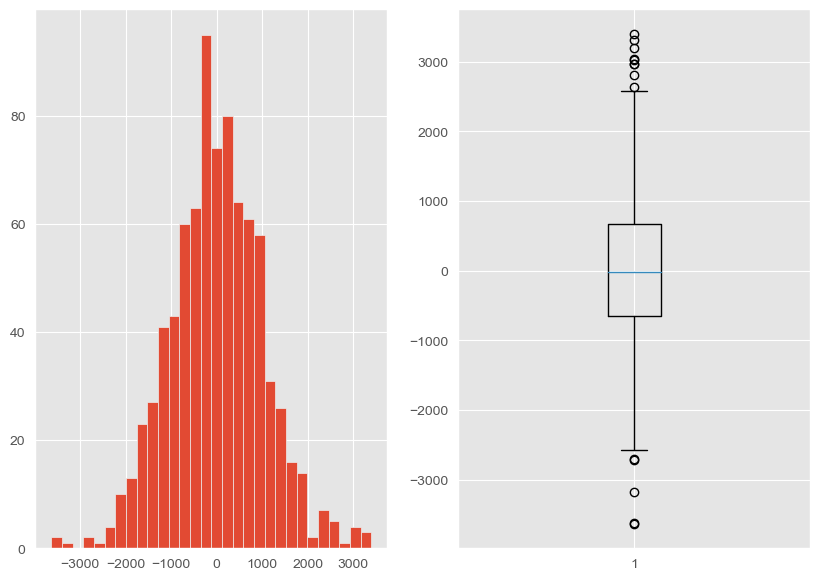

In [747]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,7))
ax1.hist(model.resid, bins=30)
ax2.boxplot(model.resid)
plt.show()

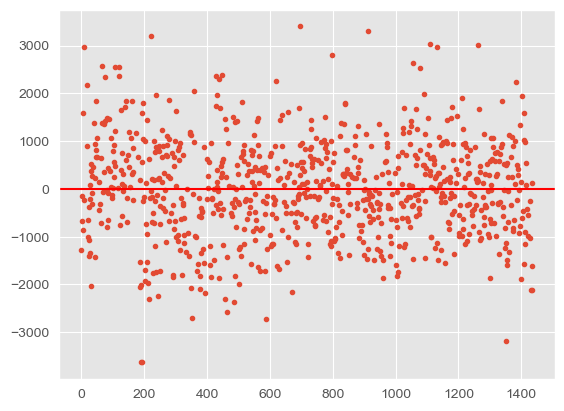

In [748]:
fitted_values = model.fittedvalues
residuals = y_train - fitted_values

fig, ax = plt.subplots()
ax.plot(residuals, marker='.', alpha = 1, linestyle='None')
ax.axhline(y=0, color = 'r')
plt.show()

Text(0, 0.5, 'Residuals')

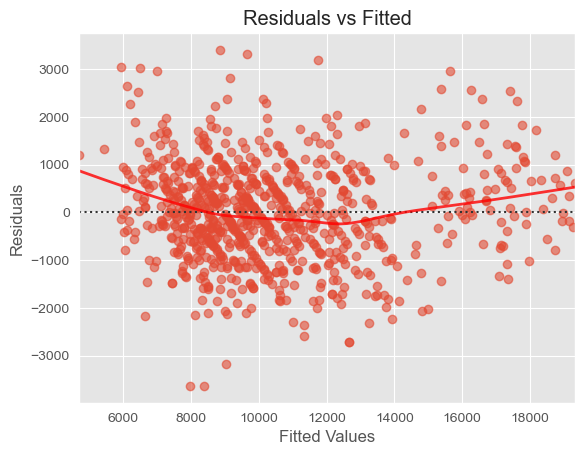

In [749]:
plot = sns.residplot(y=residuals, x=fitted_values, lowess=True,
                     scatter_kws={'alpha':0.6},
                     line_kws={'color': 'red', 'lw':2, 'alpha':0.8})
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted Values')
plot.set_ylabel('Residuals')

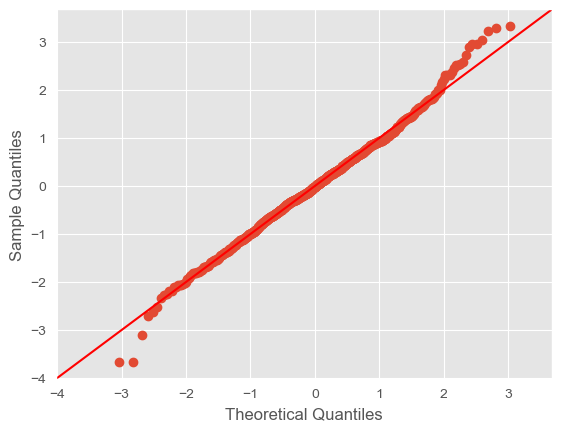

In [750]:
residuals_norm = model.get_influence().resid_studentized_internal
plot = sm.qqplot(residuals_norm, line='45')

Text(0.5, 1.0, 'Residuals vs Leverage Plot')

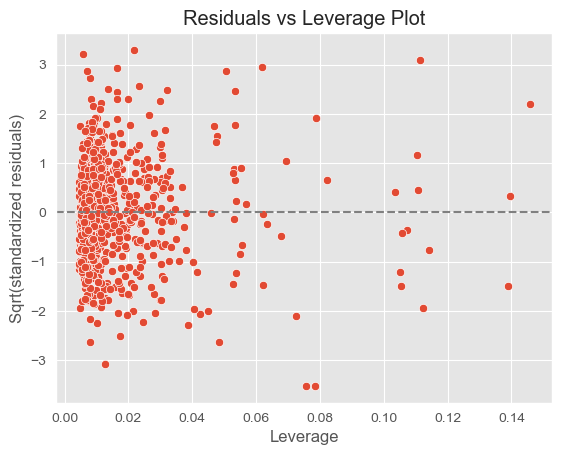

In [751]:
stand_resids = model.resid_pearson

influence = model.get_influence()
leverage = influence.hat_matrix_diag

fig, ax = plt.subplots()
sns.scatterplot(x=leverage, y=stand_resids)
ax.axhline(y=0, color='grey', linestyle='dashed')
ax.set_xlabel('Leverage')
ax.set_ylabel('Sqrt(standardized residuals)')
ax.set_title('Residuals vs Leverage Plot')

Por que el auto vale lo que vale segun el analisis que hicimos, que features elegimos, porque cada una, cuales son las variables de rendimiento (MSE MAE), etc.